# CREDIT EDA ASSIGNMENT CASE STUDY

## Importing all the important libraries which will be helpful to us in this assignment.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#### We are provided with the two bank data sets for this analysis, so to start with the process we have to import the files into the notebook. For that we use read_csv function beacuse the files are in csv format.

In [2]:
# Let's name the files as inp and inp0 for now..

In [3]:
inp= pd.read_csv('application_data.csv')
inp0= pd.read_csv('previous_application.csv')

 ###  application_data ----> This data set consist of the applications and the information about the costumers applied for the loan.
 ###  previous_application ----> Contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [4]:
# Applying inp.head() funtion for an overview of the data set.

In [5]:
inp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Print a concise summary of a DataFrame. We use inp.info() function.

In [7]:
inp.info(verbose= True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# After using inp.info() funtion we can easily see the data type of all the columns i.e whether its float64, int64 or object. Here out of 122 columns 65 columns are of float64 type, 41 columns are int64 type and 16 columns are object type. We will througly go through the columns to find out whether the data type for all columns is correct or not and if we find some data type fault we will correct it.

In [9]:
help(inp.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data ty

In [10]:
inp.describe(include= 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [11]:
# Applying inp.describe() function helps us making an overview of the data set. Here we can say that there are so many NaN values also present in our data set, so lets check what are the number of null values that are present in our data set.

In [12]:
help(inp.isnull)

Help on method isnull in module pandas.core.frame:

isnull() -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Detect missing values.
    
    Return a boolean same-sized object indicating if the values are NA.
    NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
    values.
    Everything else gets mapped to False values. Characters such as empty
    strings ``''`` or :attr:`numpy.inf` are not considered NA values
    (unless you set ``pandas.options.mode.use_inf_as_na = True``).
    
    Returns
    -------
    DataFrame
        Mask of bool values for each element in DataFrame that
        indicates whether an element is an NA value.
    
    See Also
    --------
    DataFrame.isnull : Alias of isna.
    DataFrame.notna : Boolean inverse of isna.
    DataFrame.dropna : Omit axes labels with missing values.
    isna : Top-level isna.
    
    Examples
    --------
    Show which entries in a DataFrame are NA.
    
    >>> df = pd.DataFrame(dict(age=[

In [13]:
inp.isnull().sum() # Applying inp.isnull().sum() function for all null values.

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [14]:
# There are too many null values present in many columns. We can see the numbers but for more better understanding we will create a little change in the previous command which will return the values in percentages and human brain better understand anything when its in percentage. 

In [15]:
(inp.isnull().sum()/ len(inp)*100) # Applying percentage formula gives us the values in percentages.

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

#### Here we can see that some columns like AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE etc contains very less numbers of null values which is less than 1%, but on the other hand there are some columns which contains null values more than 50%.

#### Null values more than 50% can affect our analysis. So we have to deal with the null values i.e we will go through the columns and check for the values and data. And then we will conclude that what should be done with the null values.


In [16]:
# OWN_CAR_AGE column contain more than 60% null values, so let's start analysing these kind of columns first which contain null values more than 40%.

##### OWN_CAR_AGE                  ---> "Age of client's age"
##### EXT_SOURCE_1                 ---> "Normalized score from external data source"
##### APARTMENTS_AVG               ---> "Normalized information about building where the client lives"
##### BASEMENTAREA_AVG             ---> "Normalized information about building where the client lives"
##### YEARS_BEGINEXPLUATATION_AVG  ---> "Normalized information about building where the client lives" 
##### YEARS_BUILD_AVG              ---> "Normalized information about building where the client lives"                     
##### COMMONAREA_AVG               ---> "Normalized information about building where the client lives"             
##### ELEVATORS_AVG                ---> "Normalized information about building where the client lives"     
##### ENTRANCES_AVG                ---> "Normalized information about building where the client lives"        
##### FLOORSMAX_AVG                ---> "Normalized information about building where the client lives"         
##### FLOORSMIN_AVG                ---> "Normalized information about building where the client lives"      
##### LANDAREA_AVG                 ---> "Normalized information about building where the client lives"       
##### LIVINGAPARTMENTS_AVG         ---> "Normalized information about building where the client lives"      
##### LIVINGAREA_AVG               ---> "Normalized information about building where the client lives"     
##### NONLIVINGAPARTMENTS_AVG      ---> "Normalized information about building where the client lives"   
##### NONLIVINGAREA_AVG            ---> "Normalized information about building where the client lives" 
##### APARTMENTS_MODE              ---> "Normalized information about building where the client lives"
##### BASEMENTAREA_MODE            ---> "Normalized information about building where the client lives"
##### YEARS_BEGINEXPLUATATION_MEDI    ---> "Normalized information about building where the client lives"
##### YEARS_BUILD_MEDI                ---> "Normalized information about building where the client lives"
##### COMMONAREA_MEDI                 ---> "Normalized information about building where the client lives"
##### ELEVATORS_MEDI                  ---> "Normalized information about building where the client lives"
##### ENTRANCES_MEDI                ---> "Normalized information about building where the client lives"
##### FLOORSMAX_MEDI                  ---> "Normalized information about building where the client lives"
##### FLOORSMIN_MEDI                 ---> "Normalized information about building where the client lives"
##### LANDAREA_MEDI                   ---> "Normalized information about building where the client lives"
##### LIVINGAPARTMENTS_MEDI        ---> "Normalized information about building where the client lives"
##### LIVINGAREA_MEDI                ---> "Normalized information about building where the client lives"
##### NONLIVINGAPARTMENTS_MED---> "Normalized information about building where the client lives"        
##### NONLIVINGAREA_MEDI              ---> "Normalized information about building where the client lives"
##### FONDKAPREMONT_MODE              ---> "Normalized information about building where the client lives"
##### HOUSETYPE_MODE                 ---> "Normalized information about building where the client lives"
##### TOTALAREA_MODE                  ---> "Normalized information about building where the client lives"
##### WALLSMATERIAL_MODE             ---> "Normalized information about building where the client lives"
##### EMERGENCYSTATE_MODE           ---> "Normalized information about building where the client lives"



In [17]:
# As we can see that these columns contains more than 40% of null values and seems not so important for our analysis, so we will drop these columns first. Then we will analyse remaining columns which have null values.

In [18]:
# We have analysed all the columns that contains more than 40% of null values and found that these columns consists of the information about where the client lives. As all these columns contains the same information and dropping these will not affect our analysis.

### We will drop all these columns which have more than 40% of null values.

#### For that we will use inp.dropna() function. But before that we have to know the exact numbers of columns which have null values.

In [19]:
inp.drop(columns=['OWN_CAR_AGE','EXT_SOURCE_1','BASEMENTAREA_AVG','APARTMENTS_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'], inplace=True)

In [20]:
inp.isnull().sum()/len(inp)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [21]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [22]:
# Now we are left with 72 columns which have null values, but not more than 40%.

In [23]:
# There are some columns in the data set which have null values more than 13%, so we will inpute some values here. But first we have to check for the data type of the columns i.e the column is of categorical type or numerical type. 

In [24]:
inp.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 73, dtype: object

In [25]:
# We have gone through the data types of all the variables and found that all the data types are correct. 

In [26]:
# But there are some columns which does'nt contain null values but they are of no use, so we have to drop these columns as this will decrease the column counts and it will be easier to analyse the data.

In [27]:
# Droping 5 more columns from the data set, using inp.drop() function.

In [28]:
inp.drop(columns=['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3'], inplace=True)

#### There are some columns which contains negative values i.e DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE. These columns have dates as their data, which is in wrong format so we have to correct them.

In [29]:
# First we will convert the negative values into positive values using abs funtion.

In [30]:
inp['DAYS_BIRTH']= abs(inp['DAYS_BIRTH'])
inp['DAYS_EMPLOYED']= abs(inp['DAYS_EMPLOYED'])
inp['DAYS_REGISTRATION']= abs(inp['DAYS_REGISTRATION'])
inp['DAYS_ID_PUBLISH']= abs(inp['DAYS_ID_PUBLISH'])
inp['DAYS_LAST_PHONE_CHANGE']= abs(inp['DAYS_LAST_PHONE_CHANGE'])

In [31]:
# Let's check whether it worked or not.

In [32]:
print(inp.DAYS_BIRTH, inp.DAYS_EMPLOYED, inp.DAYS_REGISTRATION, inp.DAYS_ID_PUBLISH, inp.DAYS_LAST_PHONE_CHANGE)

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64 0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64 0         3648.0
1         1186.0
2         4260.0
3         9833.0
4         4311.0
           ...  
307506    8456.0
307507    4388.0
307508    6737.0
307509    2562.0
307510    5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64 0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64 0         1134.0
1          828.0
2          815.0
3          617.0
4         11

In [33]:
# So we have corrected the negative days values to positive values.

### Let's repeat the whole process of data cleaning for df0. 
#### inp0 = previous_application.csv

In [34]:
inp0.head() 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Print a concise summary of a DataFrame. We use inp0.info() function.

In [36]:
inp0.info(verbose= True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [37]:
# After using inp0.info() funtion we can easily see the data type of all the columns i.e whether its float64, int64 or object. Here out of 37 columns 15 columns are of float64 type, 6 columns are int64 type and 16 columns are object type. We will througly go through the columns to find out whether the data type for all columns is correct or not and if we find some data type fault we will correct it.

In [38]:
inp0.describe(include= 'all')   # Applying inp0.describe() function helps us making an overview of the data set. Here we can say that there are so many NaN values also present in our data set, so lets check what are the number of null values that are present in our data set.

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,...,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,...,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,...,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,...,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,...,NaN,1.456729e+01,NaN,NaN,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,...,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,...,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,...,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,...,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


In [39]:
inp0.isnull().sum()/len(inp0)*100          # Applying inp.isnull().sum() function for all null values.

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [40]:
 # Some columns contain null values upto 99% , so let's start analysing these kind of columns first.

In [41]:
inp0.drop(columns=["AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED", "NAME_TYPE_SUITE","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"],inplace = True)

In [42]:
inp0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [43]:
# Now we have to impute some values in the data sets according to their data type. 

In [44]:
# But before that there are some more columns which i found of no use in this analysis, so we will drop these columns too.

In [45]:
inp.drop(columns=['REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'], inplace= True)

In [46]:
inp.drop(columns=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], inplace= True)

In [47]:
inp.drop(columns=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE'], inplace= True)

In [48]:
# AMT_ANNUITY, AMT_GOODS_PRICE, OCCUPATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT these columns have little null values so will impute values according to their data type.

In [49]:
# AMT_ANNUITY= An annuity is a fixed amount of money that you will get each year for the rest of your life. ref:google.com

<AxesSubplot:>

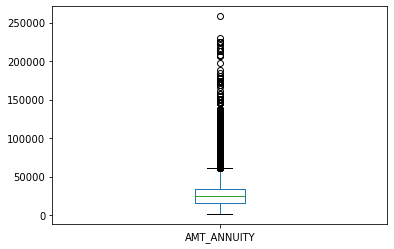

In [50]:
inp.boxplot( column =['AMT_ANNUITY'], grid = False)

#### The column contains an outlier, so imputing the missing value here with the Mean will affect the final analysis. So we will impute the values with median.

In [51]:
inp_AMT_=inp.AMT_ANNUITY.median()

In [52]:
inp_AMT_              # This is the median value and we will impute this in the null values of AMT_ANNUITY

24903.0

In [53]:
inp.loc[inp['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=inp_AMT_

In [54]:
inp.AMT_ANNUITY.isnull().sum()             # Sucessfully imputed the null values with the median.

0

In [55]:
# Now we impute missing values for AMT_GOODS_PRICE                

<AxesSubplot:>

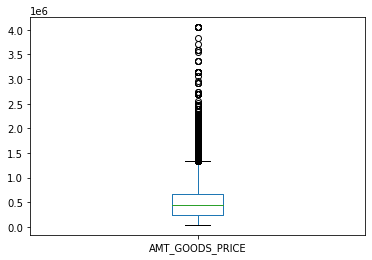

In [56]:
inp.boxplot( column =['AMT_GOODS_PRICE'], grid = False)               

In [57]:
# There is also an outlier present in the AMT_GOODS_PRICE but the null values are so small in this column so we will impute it with the mean.

In [58]:
inp_AMT_GOODS_=inp.AMT_GOODS_PRICE.mean()
print(inp_AMT_GOODS_)

538396.2074288895


In [59]:
inp.loc[inp['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=inp_AMT_GOODS_

In [60]:
inp.AMT_GOODS_PRICE.isnull().sum()

0

In [61]:
# OCCUPATION_TYPE have more than 30% of missing values. And its a categorical column so for now we will leave it as it is.

In [62]:
inp.isnull().sum()/len(inp)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021


#### OBS_30_CNT_SOCIAL_CIRCLE,  DEF_30_CNT_SOCIAL_CIRCLE,  OBS_60_CNT_SOCIAL_CIRCLE,  DEF_60_CNT_SOCIAL_CIRCLE are all observations so the correct option for imputing them is with the maximum occurance i.e MODE

In [63]:
# For this we will use fillna function.

In [64]:
inp.OBS_30_CNT_SOCIAL_CIRCLE.fillna( inp.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)
inp.DEF_30_CNT_SOCIAL_CIRCLE.fillna( inp.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 
inp.OBS_60_CNT_SOCIAL_CIRCLE.fillna( inp.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 
inp.DEF_60_CNT_SOCIAL_CIRCLE.fillna( inp.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 

In [65]:
# Rechecking the null values.

In [66]:
inp.isnull().sum()/len(inp)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000


In [67]:
# AMT_REQ_CREDIT_BUREAU_HOUR , AMT_REQ_CREDIT_BUREAU_DAY , AMT_REQ_CREDIT_BUREAU_WEEK , AMT_REQ_CREDIT_BUREAU_MON , AMT_REQ_CREDIT_BUREAU_QRT , AMT_REQ_CREDIT_BUREAU_YEAR  
# These are the number of enquiries for different time periods.

  #### Let's impute them with MODE.

In [68]:
inp.AMT_REQ_CREDIT_BUREAU_HOUR.fillna( inp.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True)
inp.AMT_REQ_CREDIT_BUREAU_DAY.fillna( inp.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)
inp.AMT_REQ_CREDIT_BUREAU_WEEK.fillna( inp.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True)
inp.AMT_REQ_CREDIT_BUREAU_MON.fillna( inp.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)
inp.AMT_REQ_CREDIT_BUREAU_QRT.fillna( inp.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)
inp.AMT_REQ_CREDIT_BUREAU_YEAR.fillna( inp.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)

In [69]:
inp.isnull().sum()/len(inp)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000


In [70]:
inp.NAME_CONTRACT_TYPE.value_counts()      # This is a categorical column with categories Cash loans and Revolving loans.

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [71]:
inp.CODE_GENDER.value_counts()             # This column contains information about the gender of the applicant.

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [72]:
# Here 4 values contain XNA that means null values. We have to impute these XNA values.

In [73]:
inp.CODE_GENDER.value_counts()/len(inp)*100       # Applying percentages, so that we can easily understand.

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [74]:
# 65.8% are 'F' i.e females. So going with the maximum values, we will fill these null values with "F" using replace function.

In [75]:
inp['CODE_GENDER'] = inp['CODE_GENDER'].replace('XNA', 'F')

In [76]:
# Rechecking the null values.

In [77]:
inp.CODE_GENDER.value_counts()         # Successfully imputed the values.

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [78]:
#Checking the values for next column i.e FLAG_OWN_CAR

In [79]:
inp.FLAG_OWN_CAR.value_counts()         # No XNA vlues present.

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [80]:
# The values contain Y and N here which are for Yes and No, but the data type for that is int64.
# So we will change Y and N into 1 and 0 for better understanding.

In [81]:
inp['FLAG_OWN_CAR'] = inp['FLAG_OWN_CAR'].map(lambda x: 1 if x == 'Y' else 0)           # Applying lambda funtion 

In [82]:
inp.FLAG_OWN_CAR.value_counts()           # Changed Y and N to 1 and 0 successfully, where 0= N and 1= Y

0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64

In [83]:
inp.FLAG_OWN_REALTY.value_counts()         # Applying the same lambda funtion here which we used in the previous column.

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [84]:
inp['FLAG_OWN_REALTY'] = inp['FLAG_OWN_REALTY'].map(lambda x: 1 if x == 'Y' else 0)

In [85]:
inp.FLAG_OWN_REALTY.value_counts()          # 1== Y and 0== N

1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [86]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  int64  
 5   FLAG_OWN_REALTY             307511 non-null  int64  
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307511 non-null  float64
 10  AMT_GOODS_PRICE             307511 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [87]:
inp.DAYS_BIRTH                 

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

#### The birth days of the applicants are in days, so for better understanding the age of the applicant we must change these days into years.

In [88]:
inp['DAYS_BIRTH']=inp['DAYS_BIRTH']/365          # There are 365 days in a year, so dividing days by 365 gives us the years.

In [89]:
inp.DAYS_BIRTH                                  # We have converted the days into years, but let's clean this by rounding it off the values.

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64

In [90]:
inp['DAYS_BIRTH']=inp['DAYS_BIRTH'].round(decimals = 0)         # After rounding off the values we have a clear understanding of the age of the applicant.

#### There are three more columns which contains days as there values, so lets convert them also in years.

In [91]:
inp['DAYS_EMPLOYED']=inp['DAYS_EMPLOYED']/365 
inp['DAYS_REGISTRATION']=inp['DAYS_REGISTRATION']/365 
inp['DAYS_ID_PUBLISH']=inp['DAYS_ID_PUBLISH']/365 

In [92]:
inp['DAYS_EMPLOYED'].round(decimals = 0) 

0            2.0
1            3.0
2            1.0
3            8.0
4            8.0
           ...  
307506       1.0
307507    1001.0
307508      22.0
307509      13.0
307510       3.0
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [93]:
inp['DAYS_REGISTRATION'].round(decimals = 0)

0         10.0
1          3.0
2         12.0
3         27.0
4         12.0
          ... 
307506    23.0
307507    12.0
307508    18.0
307509     7.0
307510    14.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [94]:
inp['DAYS_ID_PUBLISH'].round(decimals = 0)

0          6.0
1          1.0
2          7.0
3          7.0
4          9.0
          ... 
307506     5.0
307507    11.0
307508    14.0
307509     3.0
307510     1.0
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: float64

#### Going through all the columns one by one and checking for the data types , negative values , etc.

In [95]:
inp.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [96]:
inp.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [97]:
inp.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [98]:
inp.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [99]:
inp.ORGANIZATION_TYPE.value_counts()/len(inp)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

#### We have 18% XNA values in ORGANIZATION_TYPE, so we will compare this with NAME_INCOME_TYPE to know whether there is any relation between these XNA values or not.

In [100]:
inp[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(60)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE
0,Business Entity Type 3,Working
1,School,State servant
2,Government,Working
3,Business Entity Type 3,Working
4,Religion,Working
5,Other,State servant
6,Business Entity Type 3,Commercial associate
7,Other,State servant
8,XNA,Pensioner
9,Electricity,Working


#### From here we can conclude that the XNA stands for the Pensioners, so we will impute Pensioner in all the XNA using fillna function.

In [101]:
inp['ORGANIZATION_TYPE'] = inp['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')

#### Let's now clean inp0 i.e previous_application.csv.

In [102]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [103]:
inp0.NAME_CONTRACT_TYPE.value_counts()/len(inp0)*100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

In [104]:
# We will inpute the Mode value here in XNA.

In [105]:
inp0.NAME_CONTRACT_TYPE.mode()

0    Cash loans
dtype: object

In [106]:
inp0['NAME_CONTRACT_TYPE'] = inp0['NAME_CONTRACT_TYPE'].replace('XNA', 'Cash loans')

In [107]:
inp0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [108]:
inp0.AMT_ANNUITY.isnull().sum()/len(inp0)*100            # AMT_ANNUITY contains 22.2% of null values.

22.286665062081866

In [109]:
# First we will plot a box plot for looking out for outliers in AMT_ANNUITY.

In [110]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` para

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


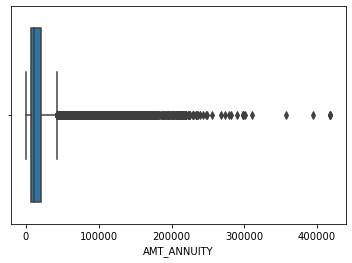

In [111]:
sns.boxplot(inp0.AMT_ANNUITY)
plt.show()

#### We have some outliers which on taking the mean of the data will hinder the analysis. That's why we will impute the missing values with the median instead of mean. 

In [112]:
inp0_AMT_ANN=inp0.AMT_ANNUITY.median()

In [113]:
inp0.loc[inp0['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=inp0_AMT_ANN

In [114]:
print(inp0.AMT_ANNUITY.isnull().sum())

0


In [115]:
# Let's check the null values in inp0 once again.

In [116]:
inp0.isnull().sum()/len(inp0)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [117]:
# Before that there are some columns which are of no use so we drop them first.

In [118]:
inp0.drop(columns=['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','CHANNEL_TYPE','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','CNT_PAYMENT'], inplace= True)

In [119]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  1670214 non-null  int64  
 1   SK_ID_CURR                  1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE          1670214 non-null  object 
 3   AMT_ANNUITY                 1670214 non-null  float64
 4   AMT_APPLICATION             1670214 non-null  float64
 5   AMT_CREDIT                  1670213 non-null  float64
 6   AMT_GOODS_PRICE             1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START     1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE      1670214 non-null  object 
 10  NAME_CONTRACT_STATUS        1670214 non-null  object 
 11  DAYS_DECISION               1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE           1670214 non-null  object 
 1

In [120]:
inp0.isnull().sum()/len(inp0)*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE               23.081773
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716
dtype: float64

In [121]:
# AMT_GOODS_PRICE have 23% null values, now we will go through AMT_GOODS_PRICE and impute the missing values.

In [122]:
inp0.AMT_GOODS_PRICE.value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


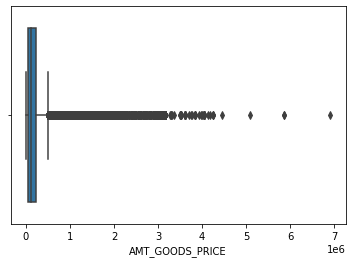

In [123]:
sns.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()

#### We can see from the boxplot that there are an outlier present in the variable. Imputing the mean value is not recommended here as it can affect our analysis. We will impute the null values by the median.

In [124]:
inp0_AMT_GOODS=inp0.AMT_GOODS_PRICE.median()

In [125]:
inp0.loc[inp0['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=inp0_AMT_GOODS

In [126]:
inp0.isnull().sum()/len(inp0)*100

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_ANNUITY                   0.000000
AMT_APPLICATION               0.000000
AMT_CREDIT                    0.000060
AMT_GOODS_PRICE               0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
NAME_CASH_LOAN_PURPOSE        0.000000
NAME_CONTRACT_STATUS          0.000000
DAYS_DECISION                 0.000000
NAME_PAYMENT_TYPE             0.000000
CODE_REJECT_REASON            0.000000
NAME_CLIENT_TYPE              0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_PORTFOLIO                0.000000
NAME_PRODUCT_TYPE             0.000000
NAME_YIELD_GROUP              0.000000
PRODUCT_COMBINATION           0.020716
dtype: float64

In [127]:
inp0.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [128]:
inp0.drop(columns=['PRODUCT_COMBINATION'], inplace=True)

In [129]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  1670214 non-null  int64  
 1   SK_ID_CURR                  1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE          1670214 non-null  object 
 3   AMT_ANNUITY                 1670214 non-null  float64
 4   AMT_APPLICATION             1670214 non-null  float64
 5   AMT_CREDIT                  1670213 non-null  float64
 6   AMT_GOODS_PRICE             1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START     1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE      1670214 non-null  object 
 10  NAME_CONTRACT_STATUS        1670214 non-null  object 
 11  DAYS_DECISION               1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE           1670214 non-null  object 
 1

#### DAYS_DECISION values are negative, so we have to remove the negative sign from DAYS_DECISION because days can't be negative.

In [130]:
inp0['DAYS_DECISION']= abs(inp0['DAYS_DECISION'])

In [131]:
inp0['DAYS_DECISION']=inp0['DAYS_DECISION']/365            #Changing days into years.

In [132]:
inp0['DAYS_DECISION'].round(decimals = 0) 

0          0.0
1          0.0
2          1.0
3          1.0
4          2.0
          ... 
1670209    1.0
1670210    5.0
1670211    4.0
1670212    3.0
1670213    3.0
Name: DAYS_DECISION, Length: 1670214, dtype: float64

# Outlier Detection
### For numerical columns of inp and inp0 checking for the outliers.

In [133]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  int64  
 5   FLAG_OWN_REALTY             307511 non-null  int64  
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307511 non-null  float64
 10  AMT_GOODS_PRICE             307511 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

### First check for the outliers in AMT_INCOME_TOTAL.

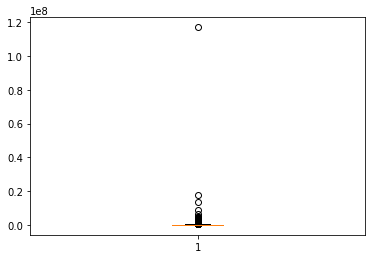

In [134]:
plt.boxplot(inp.AMT_INCOME_TOTAL, vert= True )
plt.show()

### Observation for AMT_INCOME_TOTAL
####  ---> By plotting the box plot for AMT_INCOME_TOTAL we saw that there is a value which is far apart from the rest of the values i.e we can conclude that AMT_INCOME_TOTAL contain an outlier.

### Checking for the outliers in AMT_CREDIT

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

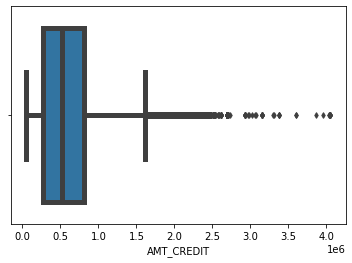

In [135]:
sns.boxplot(inp.AMT_CREDIT,  fliersize=4, linewidth=5)

### Outliers detection for DAYS_BIRTH

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_BIRTH'>

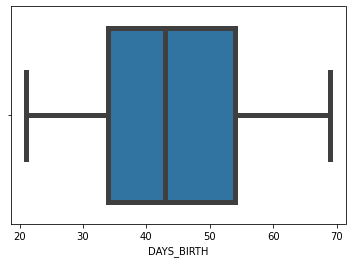

In [136]:
sns.boxplot(inp.DAYS_BIRTH,  fliersize=4, linewidth=5)

#### No outliers present in DAYS_BIRTH

### Outlier detection for DAYS_EMPLOYED.

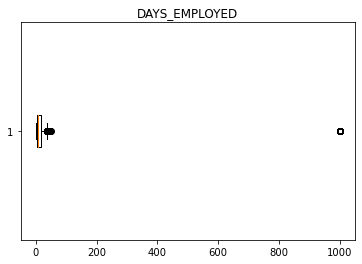

In [137]:
plt.title('DAYS_EMPLOYED')
plt.boxplot(inp.DAYS_EMPLOYED, vert=False)
plt.show()

### Plotting boxplot for CNT_FAM_MEMBERS outliers detection.

<AxesSubplot:>

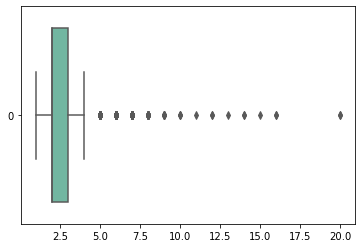

In [138]:
sns.boxplot(data=inp.CNT_FAM_MEMBERS, orient="h", palette="Set2")

# Observation
### 1. We have observed 5 different variables of application_data.csv numerical columns using matplotlib and seaborn libraries.
### 2. There are 24 numerical columns out of 33, in which we observed some very important once like CNT_FAM_MEMBERS , DAYS_EMPLOYED , DAYS_BIRTH , AMT_INCOME_TOTAL , AMT_CREDIT.
#### a.) CNT_FAM_MEMBERS - How many family members does client have. Although many families lives together as a combined family but in our data set majority of applicants have less than 5 members. So we can say that this column have outliers. i.e 20 members.
#### b.) DAYS_EMPLOYED - How many days before the application the person started current employment. Have an outlier which are greater than the birth days.
#### c.) DAYS_BIRTH - Client's age in days at the time of application - We did'nt found any outlier in this.
#### d.) AMT_CREDIT - Credit amount of the loan - We have found some outliers in this variable.
#### e.) AMT_INCOME_TOTAL - There is an outlier present in this variable which is far beyond the group.

# Binning

In [139]:
# Let's check if we need to bin any variable.

In [140]:
inp.DAYS_BIRTH.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

#### Creating bins for the DAYS_BIRTH column.

In [141]:
bins=[0,24,40,50,60,1000]
slot=['0-24','25-40' ,'41-50' ,'51-60','60 and above']
inp['DAYS_BIRTH']= pd.cut(inp['DAYS_BIRTH'], bins,labels=slot)

In [142]:
inp.DAYS_BIRTH.value_counts()

25-40           121505
41-50            75509
51-60            67955
60 and above     32408
0-24             10134
Name: DAYS_BIRTH, dtype: int64

#### Creating bins for CNT_FAM_MEMBERS

In [143]:
bins=[0,3,6,9,12,15,30]
slot=['0-3','3-6' ,'6-9' ,'9-12','12-15','>15']
inp['CNT_FAM_MEMBERS']= pd.cut(inp['CNT_FAM_MEMBERS'], bins,labels=slot)

In [144]:
inp.CNT_FAM_MEMBERS.value_counts()

0-3      278805
3-6       28583
6-9         107
9-12          6
12-15         4
>15           4
Name: CNT_FAM_MEMBERS, dtype: int64

# Analysis

### We will check here for the imbalance percentage in our Target variable.

In [145]:
# Imbalanced data sets are a special case for classification problem where the class distribution is not uniform among the classes. ref: google.com

In [146]:
inp.TARGET.value_counts()/len(inp)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

### TARGET variable
####   (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample.) 
####   (0 - all other cases) 

#### Conclusion ----> After normalising the TARGET variable, we can easily understand that how many applicants are facing difficulties in doing payments which is almost 8% of all the applicants. 
#### We will now divide our data set into two sets for further analysis.

In [147]:
# Using loc function.

In [148]:
var_TARGET_1 =inp.loc[inp['TARGET']==1]

In [149]:
var_TARGET_0 =inp.loc[inp['TARGET']==0]

In [150]:
var_TARGET_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,0,1,0,112500.0,979992.0,27076.5,...,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,0,1,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,0,0,0,135000.0,288873.0,16258.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,0,1,0,81000.0,252000.0,14593.5,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
var_TARGET_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,0,1,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# Univariate analysis

## Univariate analysis for categorical variables for both 0 and 1.

### 1.  NAME_FAMILY_STATUS  for    " var_TARGET_0 "

In [152]:
var_TARGET_0.NAME_FAMILY_STATUS.value_counts()

Married                 181582
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [153]:
var_TARGET_0.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.642345
Single / not married    0.144991
Civil marriage          0.094854
Separated               0.064206
Widow                   0.053597
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

<AxesSubplot:>

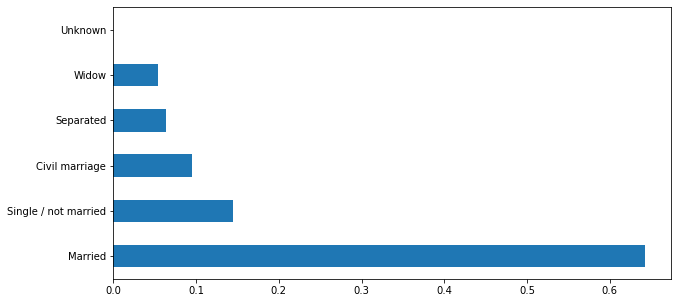

In [154]:
plt.figure(figsize= (10,5))
plt.style.use('default')
var_TARGET_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()

#### This analysis is for the status of the family of the applicant i.e he/she is Married,Single, In Civil marriage ,Separated, Widow etc. 
#### Married people are the maximum who are applying for the loan with almost 196432 count.

### 2.  NAME_FAMILY_STATUS  for " var_TARGET_1 "

In [155]:
var_TARGET_1.NAME_FAMILY_STATUS.value_counts()

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

In [156]:
var_TARGET_1.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.598187
Single / not married    0.179537
Civil marriage          0.119275
Separated               0.065257
Widow                   0.037744
Name: NAME_FAMILY_STATUS, dtype: float64

<AxesSubplot:>

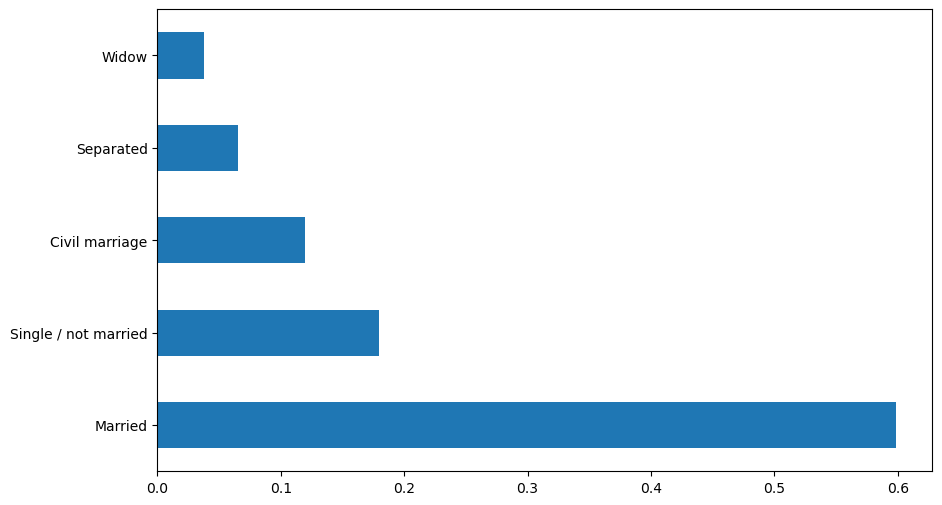

In [157]:
plt.figure(figsize= (10,6))
plt.style.use('default')
var_TARGET_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()

#### Conclusion---->  Almost 60% of the total married people's are unable to or facing some difficulties in payment of the loan.


### 3.  CODE_GENDER  for  " var_TARGET_0 "

In [158]:
var_TARGET_0.CODE_GENDER.value_counts()/len(var_TARGET_0)*100

F    66.604643
M    33.395357
Name: CODE_GENDER, dtype: float64

<AxesSubplot:title={'center':'GENDER'}, ylabel='CODE_GENDER'>

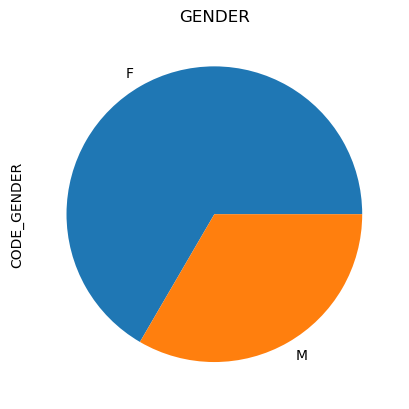

In [159]:
plt.title('GENDER')
var_TARGET_0.CODE_GENDER.value_counts(normalize=True).plot.pie(radius=1)

### 4.  CODE_GENDER  for  " var_TARGET_1 "

In [160]:
var_TARGET_1.CODE_GENDER.value_counts()/len(var_TARGET_1)*100

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

<AxesSubplot:title={'center':'GENDER'}, ylabel='CODE_GENDER'>

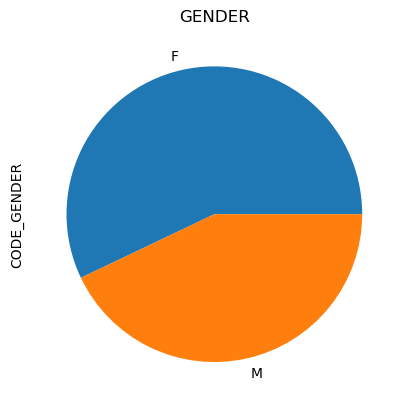

In [161]:
plt.title("GENDER")
var_TARGET_1.CODE_GENDER.value_counts(normalize=True).plot.pie(radius=1)

#### Conclusion ------> From the above pie charts it is clear that females are more active in taking loans. And out of which 57% of womens are having difficulties in repaying the loans.

### 5.  NAME_EDUCATION_TYPE for " var_TARGET_0

In [162]:
var_TARGET_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

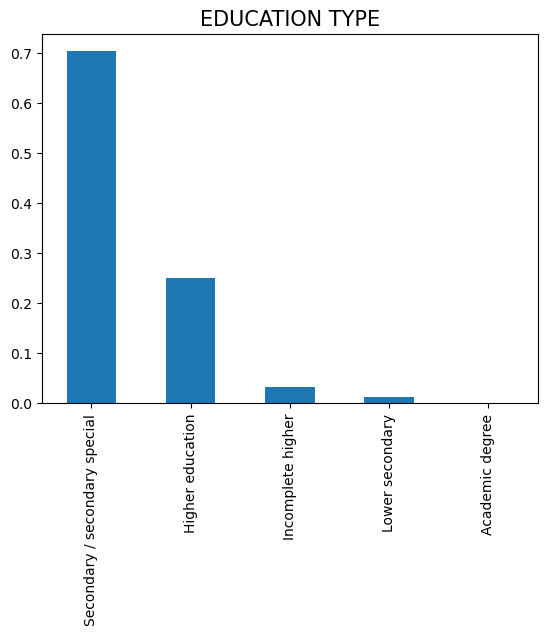

<Figure size 1000x600 with 0 Axes>

In [163]:
var_TARGET_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("EDUCATION TYPE", fontsize=15)
plt.figure(figsize=(10,6))
plt.show()

#### We have applicants with different type of education background i.e Secondary/Secondary special , Higher education , Incomplete higher , Lower secondary , Academic degree. Out of which people with Secondary/Secondary special education are very much likely to opt for a loan(about 70.3%)

### 6.  NAME_EDUCATION_TYPE for " var_TARGET_1

In [164]:
var_TARGET_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

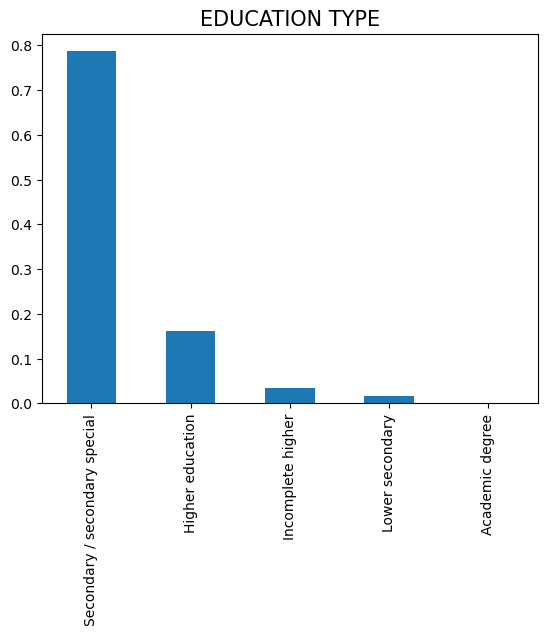

In [165]:
var_TARGET_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("EDUCATION TYPE", fontsize=15)
plt.show()

#### Secondary/Secondary special educated people are having more difficulties in repaying the loan.

### 7.  OCCUPATION_TYPE for " var_TARGET_0 "

In [166]:
var_TARGET_0.OCCUPATION_TYPE.value_counts()/len(var_TARGET_0)*100

Laborers                 17.456825
Sales staff              10.262270
Core staff                9.138054
Managers                  7.090199
Drivers                   5.835450
High skill tech staff     3.777690
Accountants               3.303666
Medicine staff            2.817614
Security staff            2.122143
Cooking staff             1.883716
Cleaning staff            1.487870
Private service staff     0.876237
Low-skill Laborers        0.613401
Secretaries               0.429098
Waiters/barmen staff      0.423084
Realty agents             0.244795
HR staff                  0.186426
IT staff                  0.174045
Name: OCCUPATION_TYPE, dtype: float64

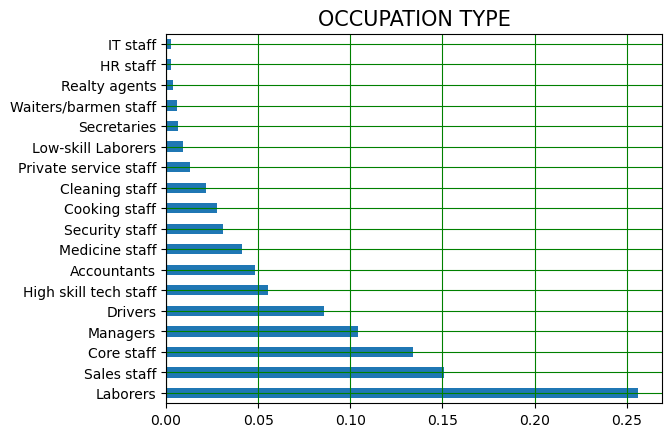

In [167]:
var_TARGET_0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title('OCCUPATION TYPE', fontsize=15)
plt.grid(color='g', linestyle='solid')

#### Laborers , Sales staff and Core staff people are domanting in this cretaria i.e opting for the loans.

###  8.  OCCUPATION_TYPE for " var_TARGET_1 "

In [168]:
var_TARGET_1.OCCUPATION_TYPE.value_counts()/len(var_TARGET_1)*100

Laborers                 23.516616
Sales staff              12.455186
Drivers                   8.487412
Core staff                7.001007
Managers                  5.349446
Security staff            2.908359
High skill tech staff     2.823766
Cooking staff             2.501511
Medicine staff            2.304129
Accountants               1.909366
Cleaning staff            1.800604
Low-skill Laborers        1.446123
Private service staff     0.704935
Waiters/barmen staff      0.612286
Secretaries               0.370594
Realty agents             0.237664
HR staff                  0.145015
IT staff                  0.136959
Name: OCCUPATION_TYPE, dtype: float64

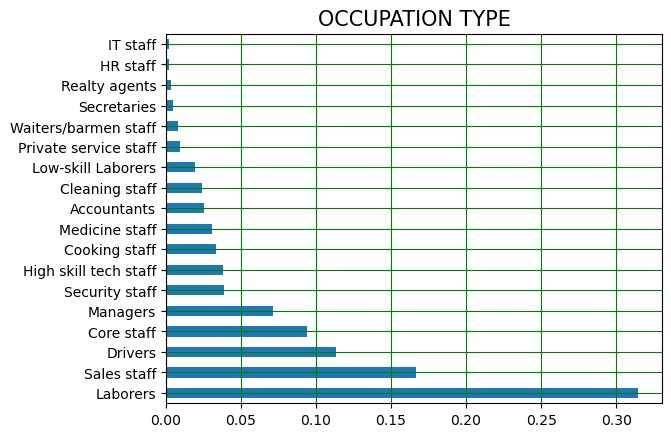

In [169]:
var_TARGET_1.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title('OCCUPATION TYPE', fontsize=15)
plt.grid(color='g', linestyle='solid')

#### Laborers are also the targeted once here who are facing difficulties in repaying the loan.
#### As compaired with the Core staff, Drivers comes out to be more defaulters here.

###  9.  ORGANIZATION_TYPE for " var_TARGET_0 "

In [170]:
var_TARGET_0.ORGANIZATION_TYPE.value_counts()/len(var_TARGET_0)*100

Business Entity Type 3    21.815371
Pensioner                 18.530808
Self-employed             12.205769
Other                      5.450571
Medicine                   3.698804
Government                 3.423587
Business Entity Type 2     3.414743
School                     2.959821
Trade: type 7              2.508437
Kindergarten               2.262581
Construction               2.099856
Business Entity Type 1     1.944560
Transport: type 4          1.732311
Industry: type 9           1.111834
Trade: type 3              1.107589
Industry: type 3           1.036486
Security                   1.034009
Housing                    0.963260
Military                   0.884020
Industry: type 11          0.873761
Bank                       0.840862
Police                     0.786739
Agriculture                0.777187
Transport: type 2          0.718819
Postal                     0.698655
Security Ministries        0.664341
Trade: type 2              0.625075
Restaurant                 0

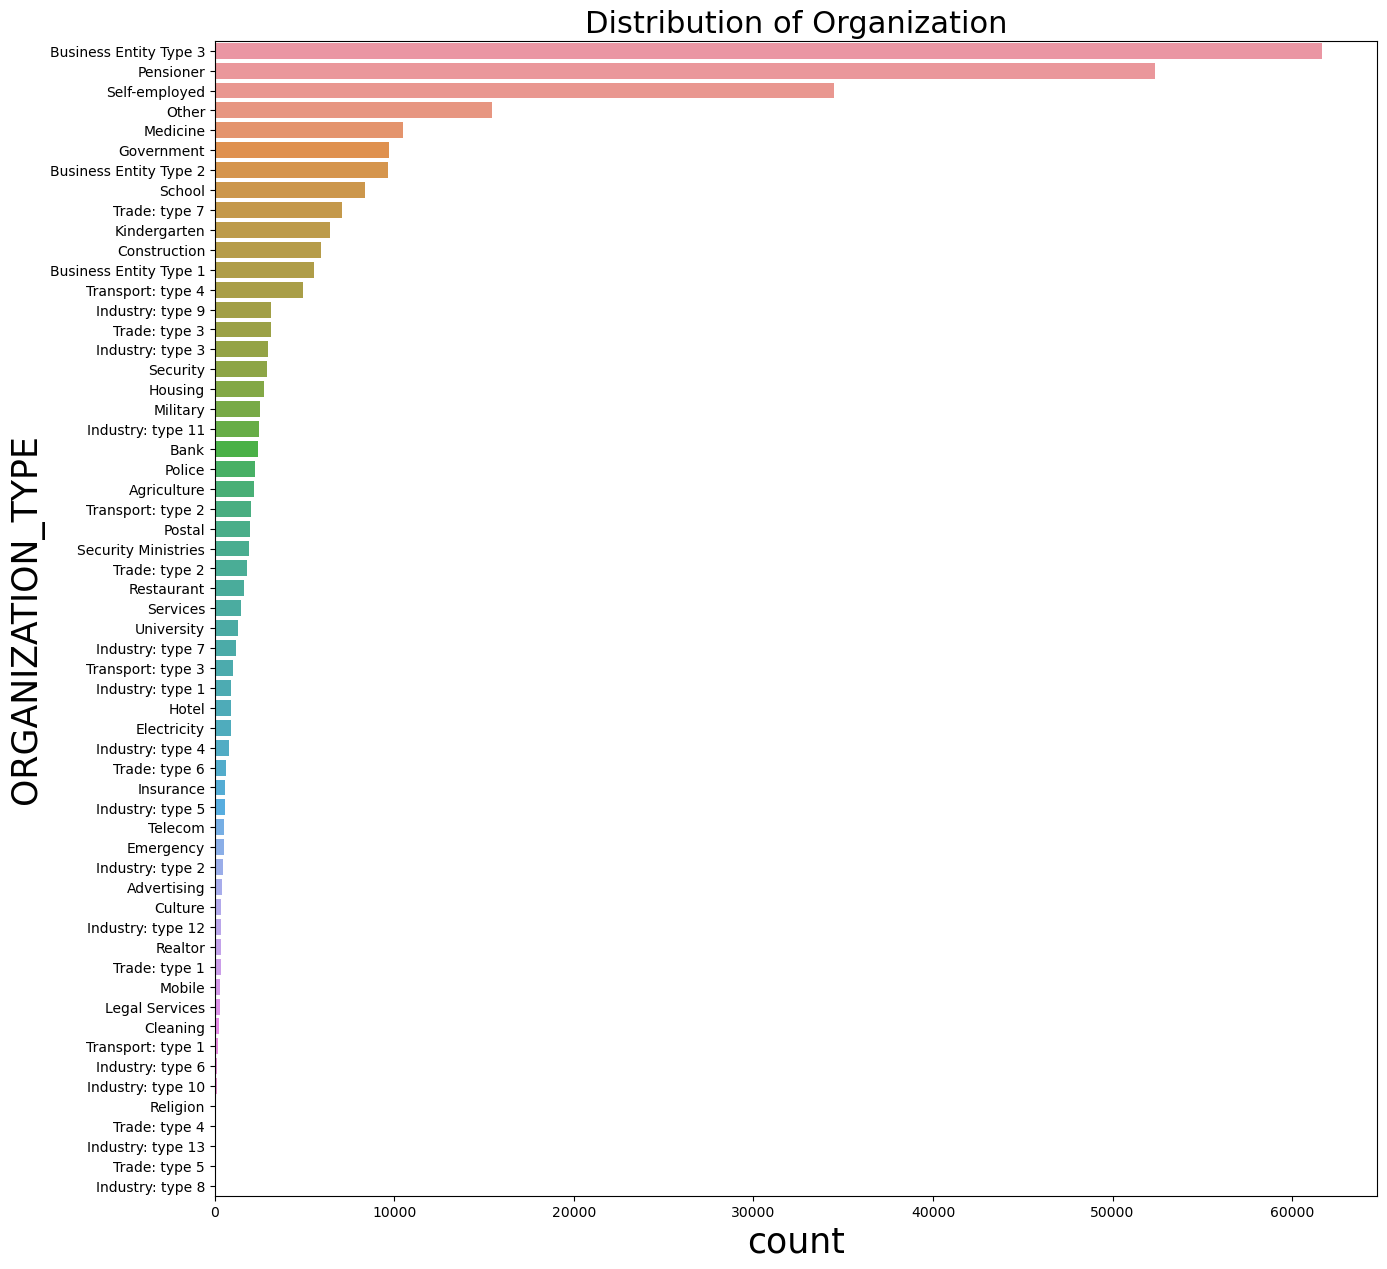

In [171]:
plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 22

plt.title("Distribution of Organization")
sns.countplot(data=var_TARGET_0,y='ORGANIZATION_TYPE',order=var_TARGET_0['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

#### Almost 51% of the loan application in different business entities are covered by Business Entity Type 3 , Pensioner and Self-employed. 

###  10.  ORGANIZATION_TYPE for " var_TARGET_1 "

In [172]:
var_TARGET_1.ORGANIZATION_TYPE.value_counts()/len(var_TARGET_1)*100

Business Entity Type 3    25.470292
Self-employed             15.742195
Pensioner                 12.044310
Other                      5.135952
Business Entity Type 2     3.625378
Construction               3.162135
Trade: type 7              2.980866
Medicine                   2.968781
Government                 2.924471
School                     2.118832
Transport: type 4          2.018127
Business Entity Type 1     1.961732
Kindergarten               1.949648
Trade: type 3              1.454179
Industry: type 3           1.401813
Security                   1.305136
Agriculture                1.035247
Housing                    0.946626
Industry: type 11          0.942598
Industry: type 9           0.906344
Restaurant                 0.853978
Transport: type 3          0.753273
Postal                     0.733132
Transport: type 2          0.692850
Military                   0.543807
Trade: type 2              0.535750
Bank                       0.523666
Police                     0

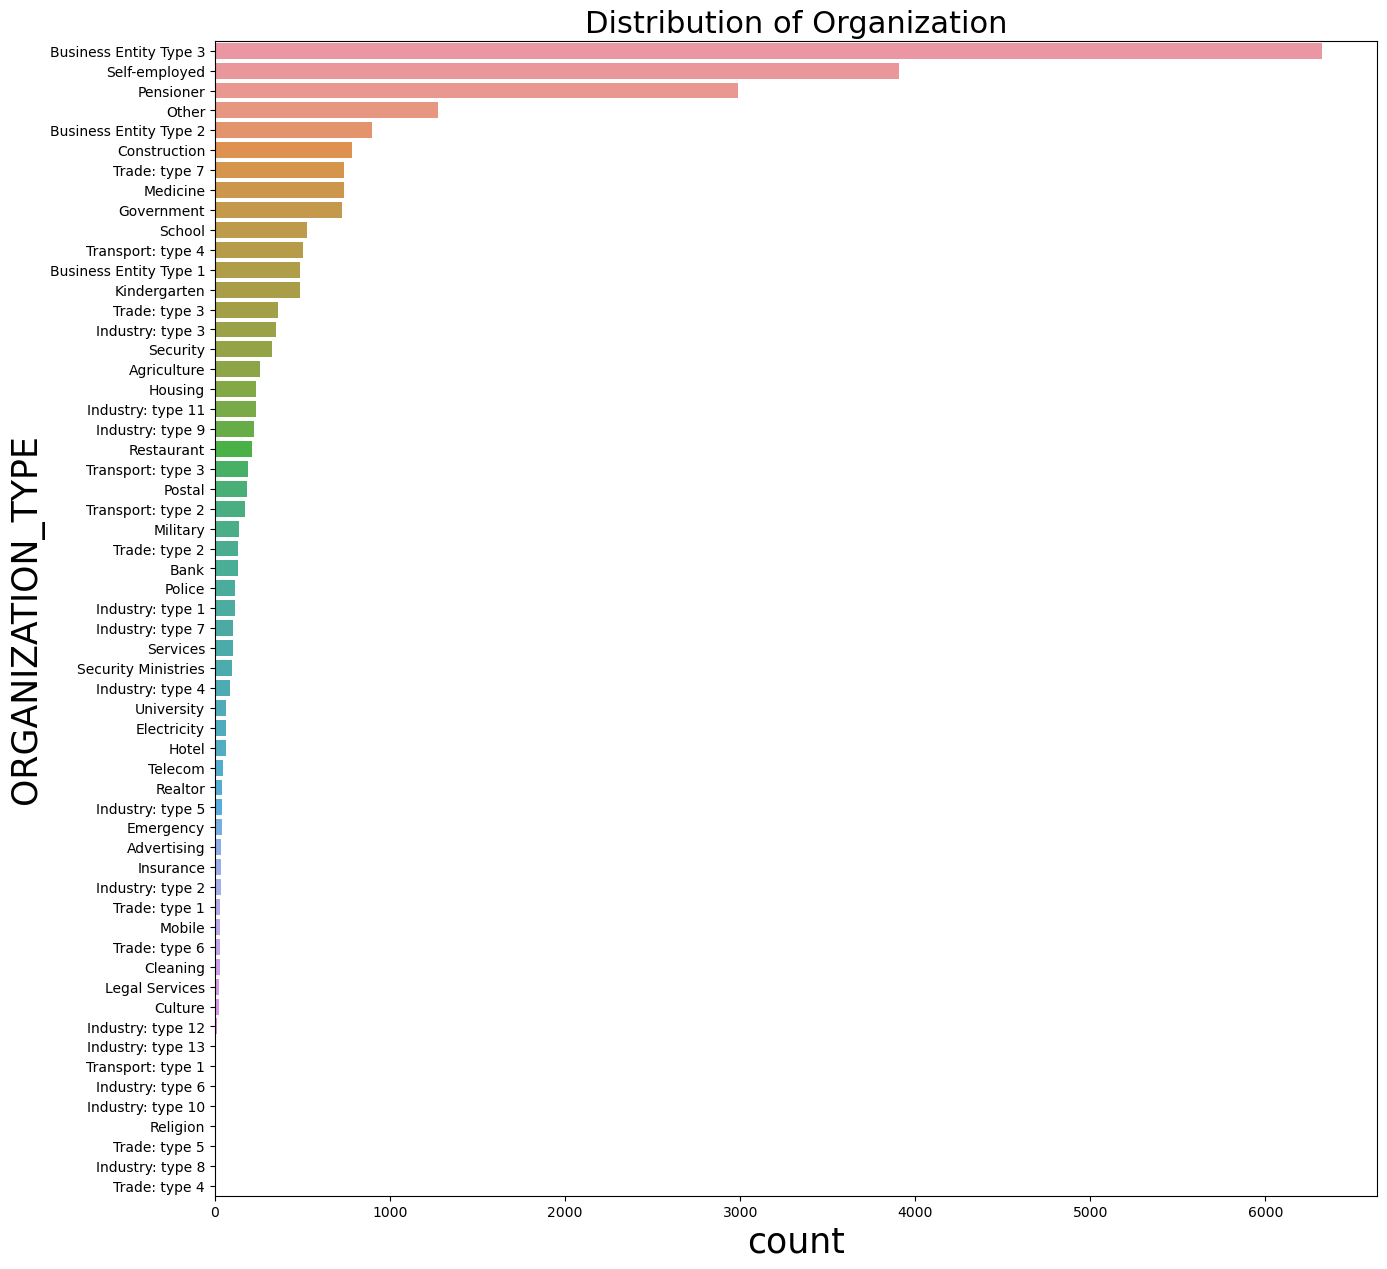

In [173]:
plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 22

plt.title("Distribution of Organization")
sns.countplot(data=var_TARGET_1,y='ORGANIZATION_TYPE',order=var_TARGET_1['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

#### Seems like Self-employed are facing a little bit more problem in paying their debt.

### 11.  NAME_HOUSING_TYPE for  "  var_TARGET_0 "

In [174]:
var_TARGET_0.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.890019
With parents           0.046355
Municipal apartment    0.036181
Rented apartment       0.015140
Office apartment       0.008649
Co-op apartment        0.003654
Name: NAME_HOUSING_TYPE, dtype: float64

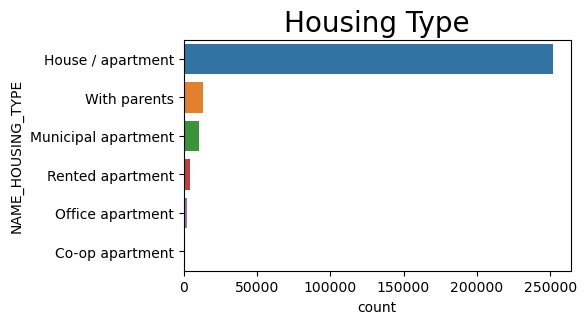

In [175]:
plt.figure(figsize=(5,3))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 20

plt.title("Housing Type")
sns.countplot(y="NAME_HOUSING_TYPE", data=var_TARGET_0,order=var_TARGET_0['NAME_HOUSING_TYPE'].value_counts().index)
plt.show()

#### Almost 89% of the applicants are living in House/apartment.

### 12.  NAME_HOUSING_TYPE for  "  var_TARGET_1 "

In [176]:
var_TARGET_1.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.856878
With parents           0.069930
Municipal apartment    0.038469
Rented apartment       0.024209
Office apartment       0.006928
Co-op apartment        0.003585
Name: NAME_HOUSING_TYPE, dtype: float64

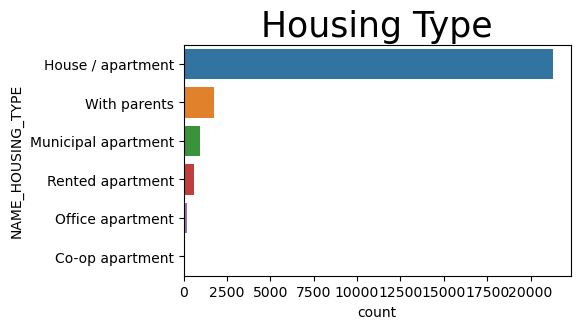

In [177]:
plt.figure(figsize=(5,3))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 25

plt.title("Housing Type")
sns.countplot(y="NAME_HOUSING_TYPE", data=var_TARGET_1,order=var_TARGET_1['NAME_HOUSING_TYPE'].value_counts().index)
plt.show()

### 13.  NAME_INCOME_TYPE for  " var_TARGET_0 "

In [178]:
var_TARGET_0.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.507807
Commercial associate    0.234384
Pensioner               0.185294
State servant           0.072356
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64

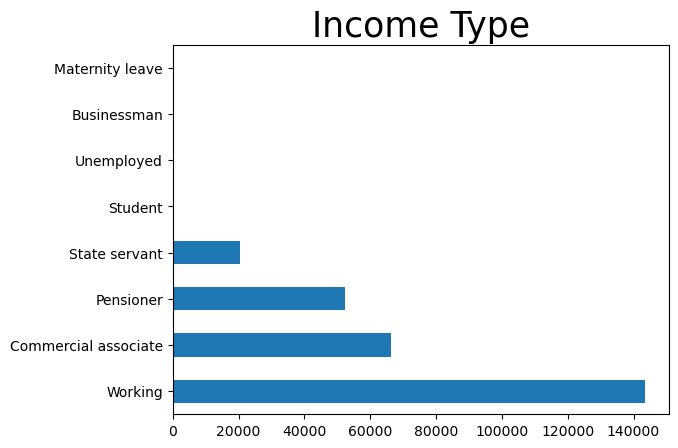

<Figure size 800x500 with 0 Axes>

In [179]:
var_TARGET_0.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.title("Income Type")
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.show()

#### For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.


### 14.  NAME_INCOME_TYPE for  " var_TARGET_1 "

In [180]:
var_TARGET_1.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.613253
Commercial associate    0.215911
Pensioner               0.120121
State servant           0.050312
Unemployed              0.000322
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

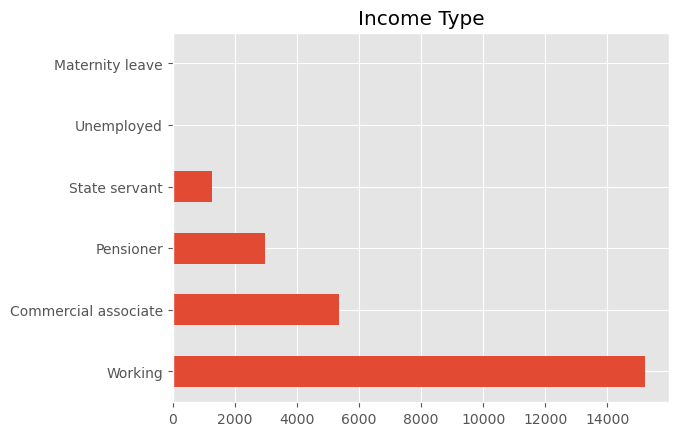

<Figure size 800x500 with 0 Axes>

In [181]:
var_TARGET_1.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.title("Income Type")
plt.figure(figsize=(8,5))
plt.style.use('ggplot')

plt.show()

#### Although applicants who are working does'nt means they are paying their debts. Like here Working applicants are facing some kind of difficulties. 

### 15.  NAME_CONTRACT_TYPE  for  " var_TARGET_0 "

In [182]:
var_TARGET_0.NAME_CONTRACT_TYPE.value_counts()/len(var_TARGET_0)*100

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

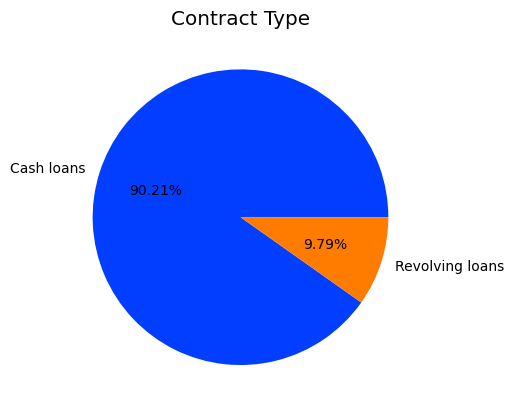

In [183]:
data=var_TARGET_0.NAME_CONTRACT_TYPE.value_counts()
labels=['Cash loans','Revolving loans']
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.02f%%')
plt.title("Contract Type")
plt.show()

#### 90.21% of applicants are opting for cash loans as compared to revolving loans.

### 16.  NAME_CONTRACT_TYPE  for  " var_TARGET_1 "

In [184]:
var_TARGET_1.NAME_CONTRACT_TYPE.value_counts()/len(var_TARGET_1)*100

Cash loans         93.538771
Revolving loans     6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64

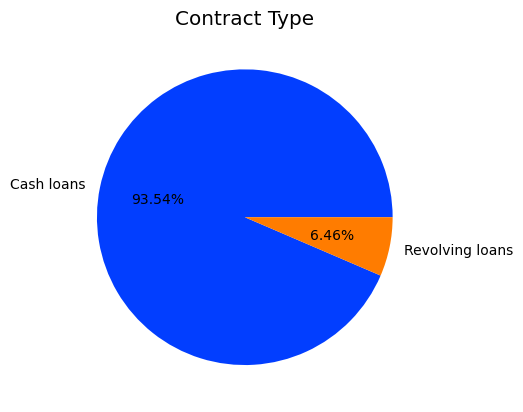

In [185]:
data=var_TARGET_1.NAME_CONTRACT_TYPE.value_counts()
labels=['Cash loans','Revolving loans']
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.02f%%')
plt.title("Contract Type")
plt.show()

#### Cash loan is turning out to be the type of contract in which maximum number of applicants are defaulting. 

### 17.  DAYS_BIRTH  for  " var_TARGET_0 "

In [186]:
var_TARGET_0.DAYS_BIRTH.value_counts()/len(var_TARGET_0)*100

25-40           38.695231
41-50           24.686047
51-60           22.587960
60 and above    10.899726
0-24             3.131036
Name: DAYS_BIRTH, dtype: float64

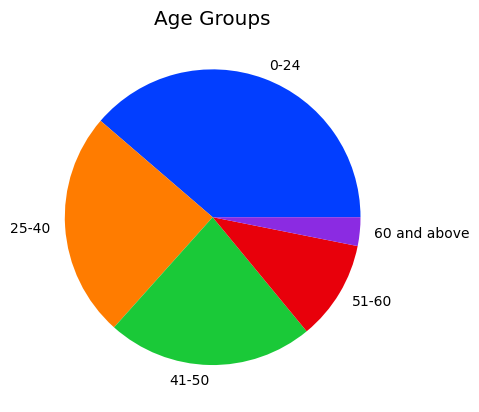

In [187]:
data=var_TARGET_0.DAYS_BIRTH.value_counts()
labels=['0-24','25-40','41-50','51-60','60 and above']
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors)
plt.title("Age Groups")
plt.show()

In [188]:
### DAYS_BIRTH  for  " var_TARGET_1 "

In [189]:
var_TARGET_1.DAYS_BIRTH.value_counts()/len(var_TARGET_1)*100

25-40           48.817724
41-50           23.061430
51-60           16.523666
60 and above     6.429003
0-24             5.168177
Name: DAYS_BIRTH, dtype: float64

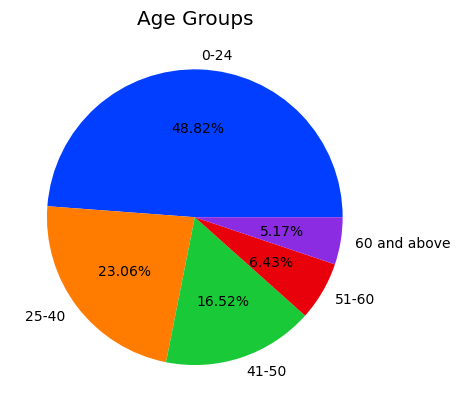

In [190]:
data=var_TARGET_1.DAYS_BIRTH.value_counts()
labels=['0-24','25-40','41-50','51-60','60 and above']
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.02f%%')
plt.title("Age Groups")
plt.show()

# Univariate analysis for numerical variables.

### 18.  AMT_ANNUITY  for  "var_TARGET_0"

In [191]:
var_TARGET_0.AMT_ANNUITY.describe()

count    282686.000000
mean      27163.527386
std       14658.003451
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

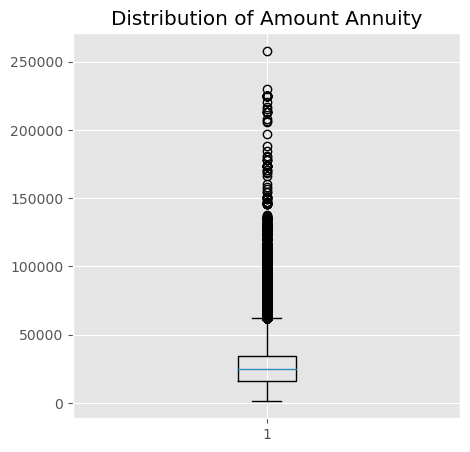

In [192]:
plt.figure(figsize=(5,5))
plt.title('Distribution of Amount Annuity')
plt.boxplot(var_TARGET_0.AMT_ANNUITY)
plt.show()

#### There is an outlier present in the Amount Annuity.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


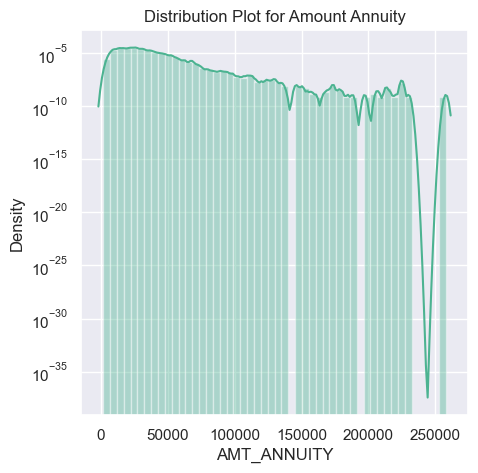

In [193]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,5))
plt.title("Distribution Plot for Amount Annuity")
sns.distplot(var_TARGET_0[~var_TARGET_0['AMT_ANNUITY'].isna()]['AMT_ANNUITY'],color="#4CB391")
plt.yscale('log')
    
plt.show()

### 19.  AMT_ANNUITY  for  "var_TARGET_1"

In [194]:
var_TARGET_1.AMT_ANNUITY.describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

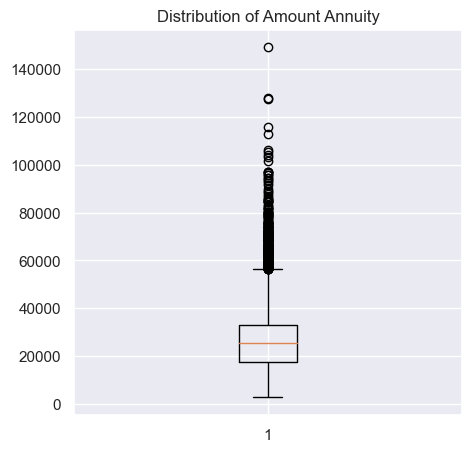

In [195]:
plt.figure(figsize=(5,5))
plt.title('Distribution of Amount Annuity')
plt.boxplot(var_TARGET_1.AMT_ANNUITY)
plt.show()

In [196]:
# We have noticed some outliers.
# People with large annuity amounts tends to default.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


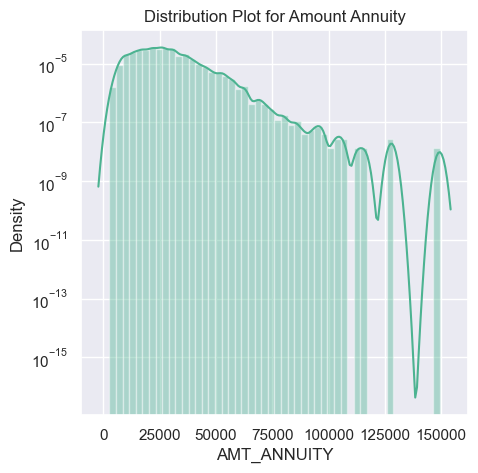

In [197]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,5))
plt.title("Distribution Plot for Amount Annuity")
sns.distplot(var_TARGET_1[~var_TARGET_1['AMT_ANNUITY'].isna()]['AMT_ANNUITY'],color="#4CB391")
plt.yscale('log')
    
plt.show()

### 20.  AMT_GOODS_PRICE  for  "var_TARGET_0"

In [198]:
var_TARGET_0.AMT_GOODS_PRICE.describe()

count    2.826860e+05
mean     5.427328e+05
std      3.736156e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.850024e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

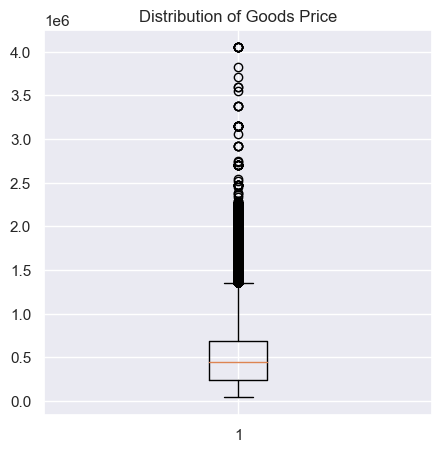

In [199]:
plt.figure(figsize=(5,5))
plt.title('Distribution of Goods Price')
plt.boxplot(var_TARGET_0.AMT_GOODS_PRICE)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


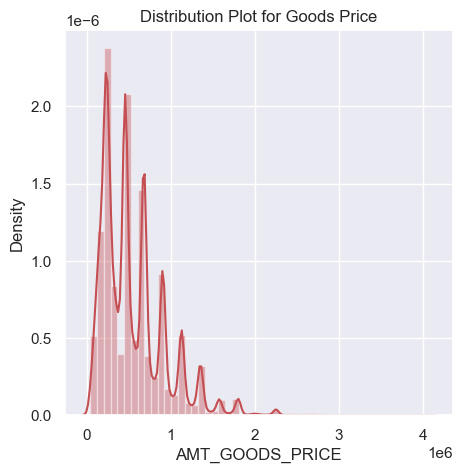

In [200]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,5))
plt.title("Distribution Plot for Goods Price")
sns.distplot(var_TARGET_0[~var_TARGET_0['AMT_GOODS_PRICE'].isna()]['AMT_GOODS_PRICE'],color="r")
    
plt.show()

### 21.  AMT_GOODS_PRICE  for  "var_TARGET_1"

In [201]:
var_TARGET_1.AMT_GOODS_PRICE.describe()

count    2.482500e+04
mean     4.890142e+05
std      3.115080e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.600000e+06
Name: AMT_GOODS_PRICE, dtype: float64

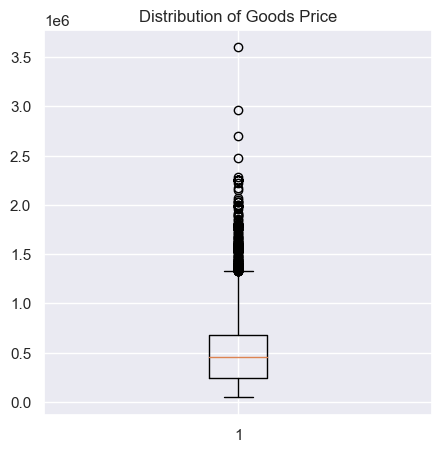

In [202]:
plt.figure(figsize=(5,5))
plt.title('Distribution of Goods Price')
plt.boxplot(var_TARGET_1.AMT_GOODS_PRICE)
plt.show()

In [203]:
# Outlier detected.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


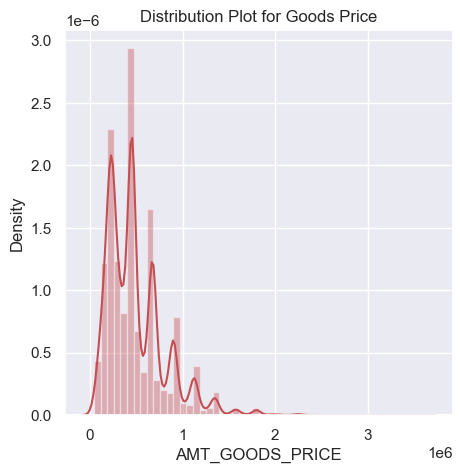

In [204]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,5))
plt.title("Distribution Plot for Goods Price")
sns.distplot(var_TARGET_1[~var_TARGET_1['AMT_GOODS_PRICE'].isna()]['AMT_GOODS_PRICE'],color="r")
    
plt.show()

### 22. CNT_CHILDREN  for  "var_TARGET_0"

In [205]:
var_TARGET_0.CNT_CHILDREN.describe()

count    282686.000000
mean          0.412946
std           0.718843
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

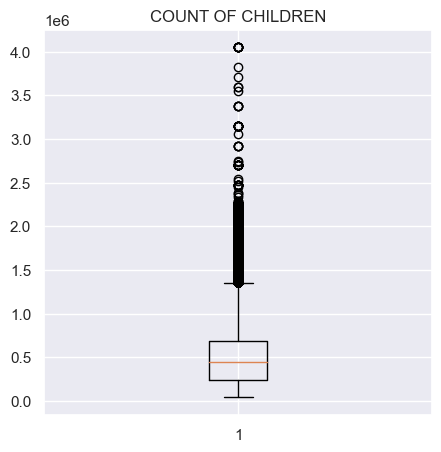

In [206]:
plt.figure(figsize=(5,5))
plt.title('COUNT OF CHILDREN')
plt.boxplot(var_TARGET_0.AMT_GOODS_PRICE)
plt.show()

#### Maximum number of children here is 19, in today's time people don't have this much kids, so we can say there are many outliers present in the set.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


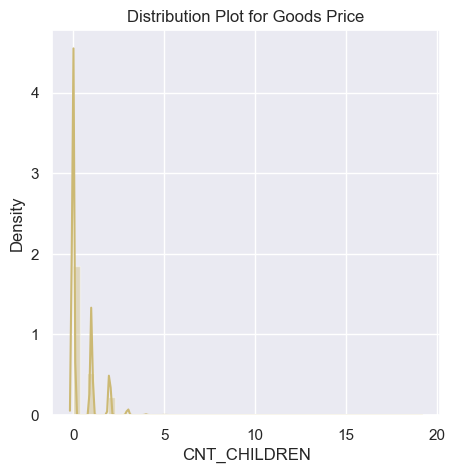

In [207]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,5))
plt.title("Distribution Plot for Goods Price")
sns.distplot(var_TARGET_0[~var_TARGET_0['CNT_CHILDREN'].isna()]['CNT_CHILDREN'],color="y")
    
plt.show()

#### Maximum distrubition is around 4.5

### 23.  CNT_CHILDREN  for  "var_TARGET_1"

In [208]:
var_TARGET_1.CNT_CHILDREN.describe()

count    24825.000000
mean         0.463807
std          0.756903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         11.000000
Name: CNT_CHILDREN, dtype: float64

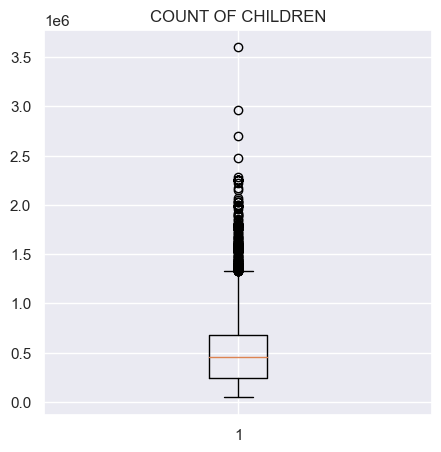

In [209]:
plt.figure(figsize=(5,5))
plt.title('COUNT OF CHILDREN')
plt.boxplot(var_TARGET_1.AMT_GOODS_PRICE)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


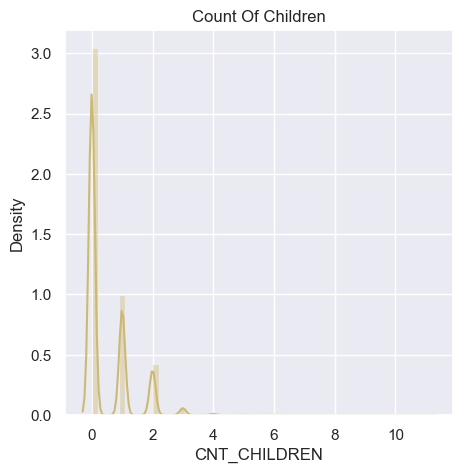

In [210]:
sns.set(style="darkgrid")
plt.figure(figsize=(5,5))
plt.title("Count Of Children")
sns.distplot(var_TARGET_1[~var_TARGET_1['CNT_CHILDREN'].isna()]['CNT_CHILDREN'],color="y")
    
plt.show()

#### Maximum number of people who are dafaulting in their loans are having 0 to 3 kids. We can say that people having more than 4 kids are seems to pay their debts on time. 

### We have to find correlation for numerical columns for both the sets.

#### We will bucket our categorical columns using pd.qcut here for correlation matrix.

In [211]:
# Let's make a numerical column first.
numeric_column=list(inp.select_dtypes(include= ['int64','float64']))
numeric_column

['SK_ID_CURR',
 'TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [212]:
len(numeric_column)

22

In [213]:
# Target variable is the variable w.r.t to which we have to correlate. That's why removing TARGET.
numeric_column.remove('TARGET')

In [214]:
# Assigning cor_rel_0 and cor_rel_1 new variables for correlation.
cor_rel_0= var_TARGET_0[numeric_column].corr()
print(cor_rel_0)

                            SK_ID_CURR  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR                    1.000000      0.001216         0.000841   
FLAG_OWN_CAR                  0.001216      1.000000        -0.005198   
FLAG_OWN_REALTY               0.000841     -0.005198         1.000000   
CNT_CHILDREN                 -0.000716      0.105650        -0.004041   
AMT_INCOME_TOTAL              0.001739      0.184219         0.002061   
AMT_CREDIT                   -0.000342      0.117166        -0.041648   
AMT_ANNUITY                   0.000071      0.141781        -0.006001   
AMT_GOODS_PRICE              -0.000206      0.121121        -0.047686   
DAYS_EMPLOYED                 0.001744     -0.159565         0.071407   
DAYS_REGISTRATION             0.001475     -0.090376         0.025940   
DAYS_ID_PUBLISH               0.000077     -0.017931        -0.005851   
OBS_30_CNT_SOCIAL_CIRCLE     -0.000697      0.002574         0.017094   
DEF_30_CNT_SOCIAL_CIRCLE      0.000553     -0.01462

In [215]:
cor_rel_1=var_TARGET_1[numeric_column].corr()
print(cor_rel_1)

                            SK_ID_CURR  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR                    1.000000      0.000632        -0.001025   
FLAG_OWN_CAR                  0.000632      1.000000         0.023182   
FLAG_OWN_REALTY              -0.001025      0.023182         1.000000   
CNT_CHILDREN                 -0.005144      0.067519         0.016963   
AMT_INCOME_TOTAL             -0.010165      0.017103         0.007910   
AMT_CREDIT                   -0.001290      0.095546        -0.011225   
AMT_ANNUITY                  -0.007578      0.136593         0.003956   
AMT_GOODS_PRICE              -0.001816      0.098545        -0.021082   
DAYS_EMPLOYED                -0.005161     -0.112499         0.056759   
DAYS_REGISTRATION            -0.006342     -0.068781         0.013547   
DAYS_ID_PUBLISH               0.002539      0.021588        -0.019746   
OBS_30_CNT_SOCIAL_CIRCLE     -0.009424      0.013564         0.039138   
DEF_30_CNT_SOCIAL_CIRCLE     -0.005567     -0.01310

In [216]:
# Applying heatmap function for better understanding of the correlation.

### Correlation heatmap for TARGET 0

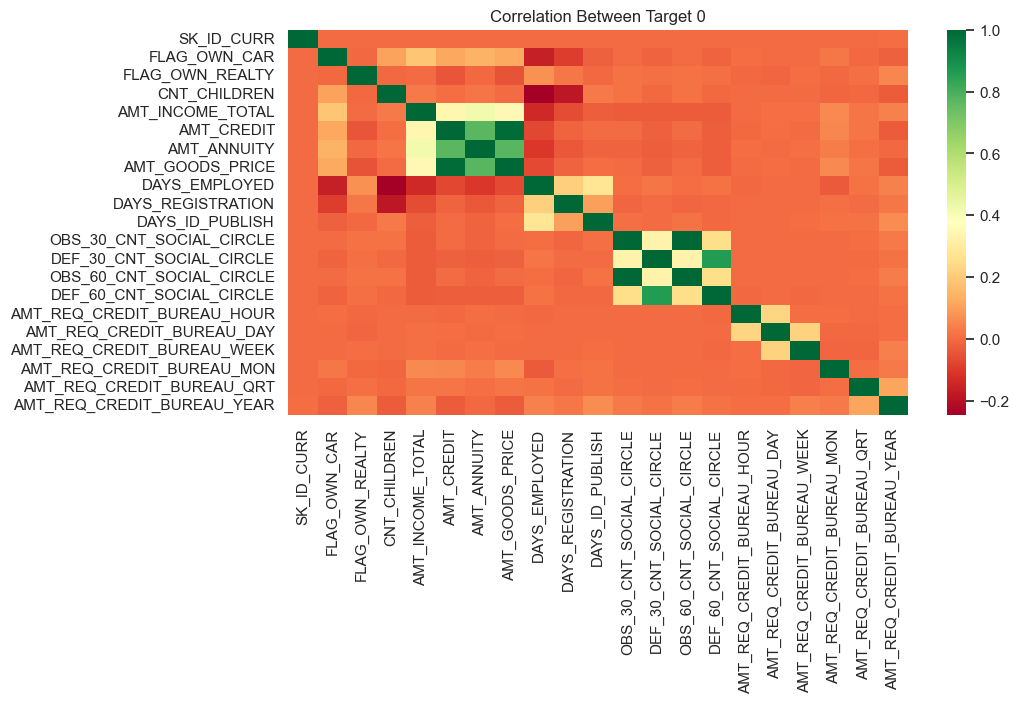

In [217]:
plt.figure(figsize=(10,5))
plt.title("Correlation Between Target 0")

sns.heatmap(cor_rel_0 , cmap='RdYlGn')
plt.show()

### Correlation heatmap for TARGET 1

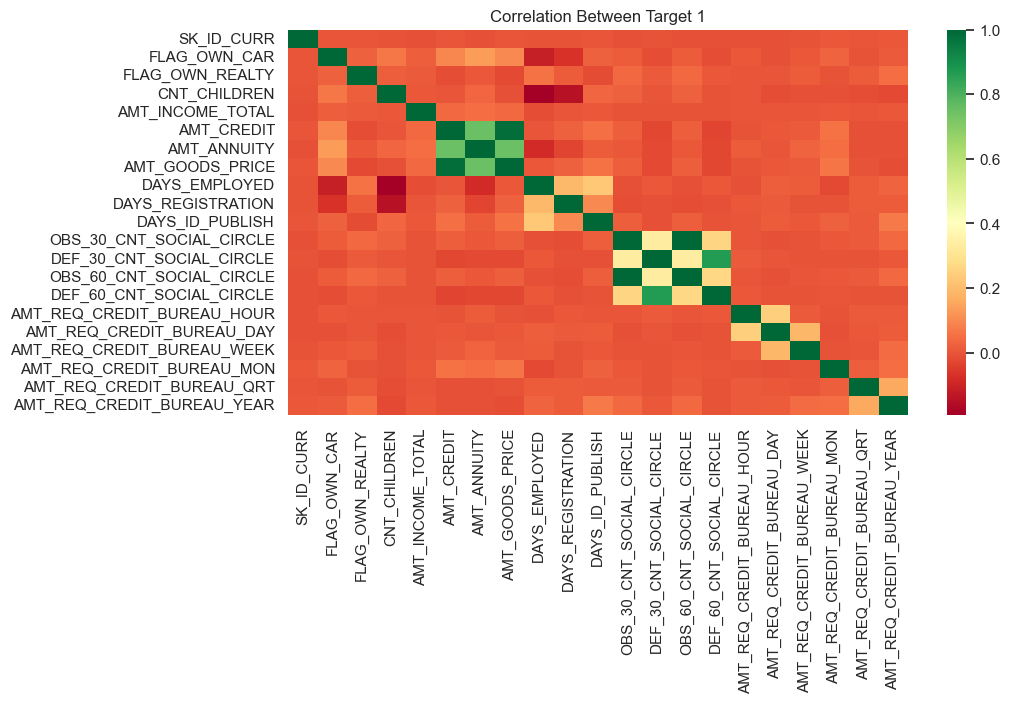

In [218]:
plt.figure(figsize=(10,5))
plt.title("Correlation Between Target 1")
sns.heatmap(cor_rel_1 , cmap='RdYlGn')
plt.show()

In [219]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  int64   
 2   NAME_CONTRACT_TYPE          307511 non-null  object  
 3   CODE_GENDER                 307511 non-null  object  
 4   FLAG_OWN_CAR                307511 non-null  int64   
 5   FLAG_OWN_REALTY             307511 non-null  int64   
 6   CNT_CHILDREN                307511 non-null  int64   
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307511 non-null  float64 
 10  AMT_GOODS_PRICE             307511 non-null  float64 
 11  NAME_INCOME_TYPE            307511 non-null  object  
 12  NAME_EDUCATION_TYPE         307511 non-null  object  
 13 

## Bivariate Analysis

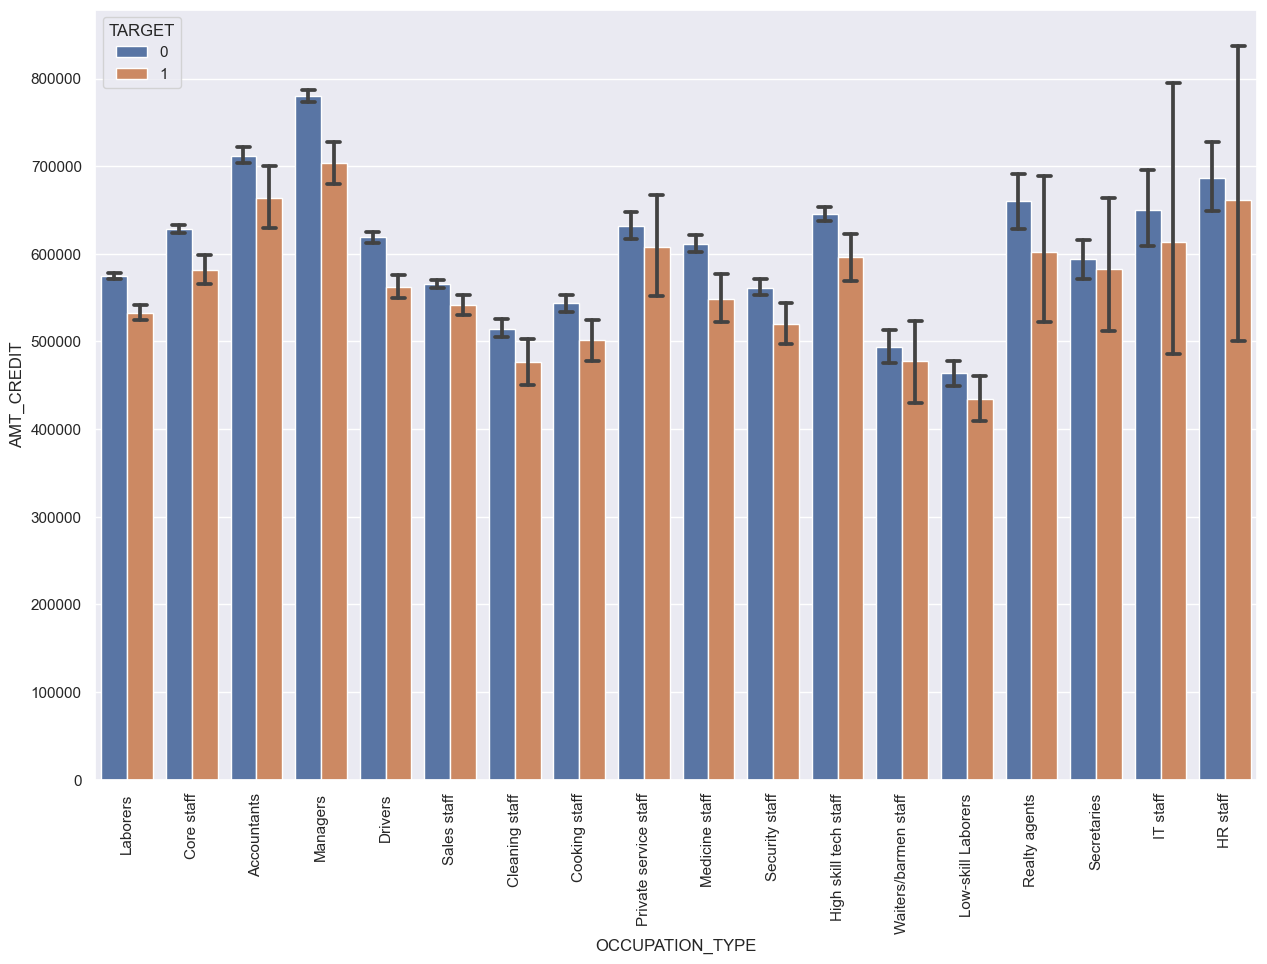

In [220]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)

sns.barplot(data=inp ,x='OCCUPATION_TYPE', y='AMT_CREDIT', hue='TARGET',capsize=.2)
plt.show()

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='AMT_CREDIT'>

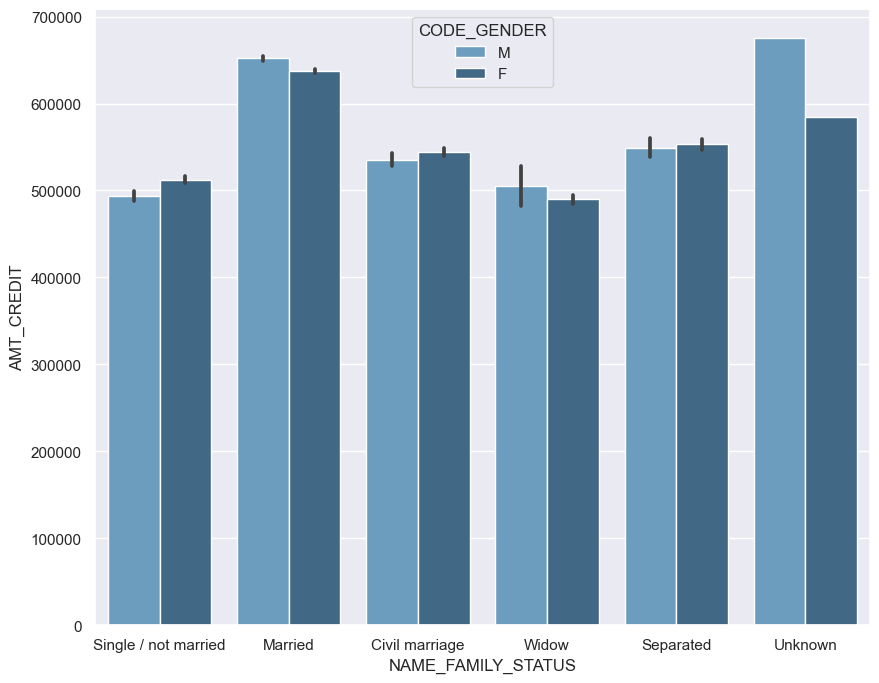

In [221]:
plt.figure(figsize=(10,8))

sns.barplot(data=inp ,x='NAME_FAMILY_STATUS', y='AMT_CREDIT', hue='CODE_GENDER', palette="Blues_d")

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='AMT_CREDIT'>

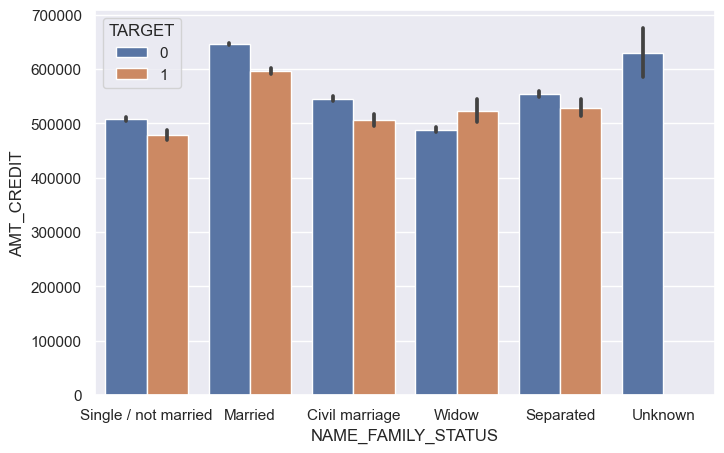

In [222]:
plt.figure(figsize=(8,5))
sns.barplot(data=inp ,x='NAME_FAMILY_STATUS', y='AMT_CREDIT', hue='TARGET')

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='AMT_CREDIT'>

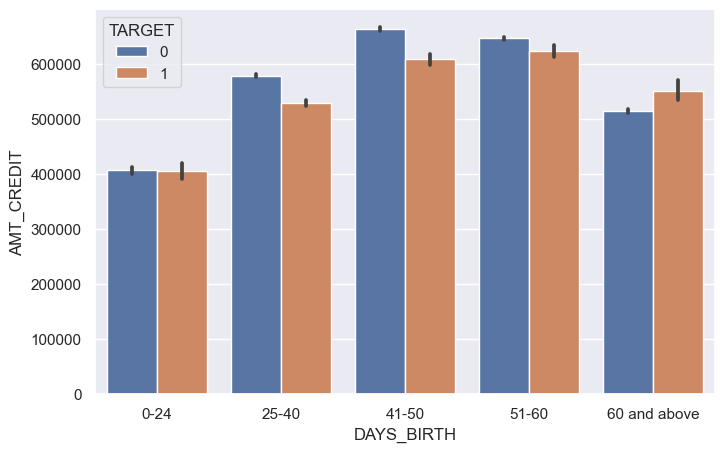

In [223]:
plt.figure(figsize=(8,5))
sns.barplot(data=inp ,x='DAYS_BIRTH', y='AMT_CREDIT', hue='TARGET')

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='AMT_CREDIT'>

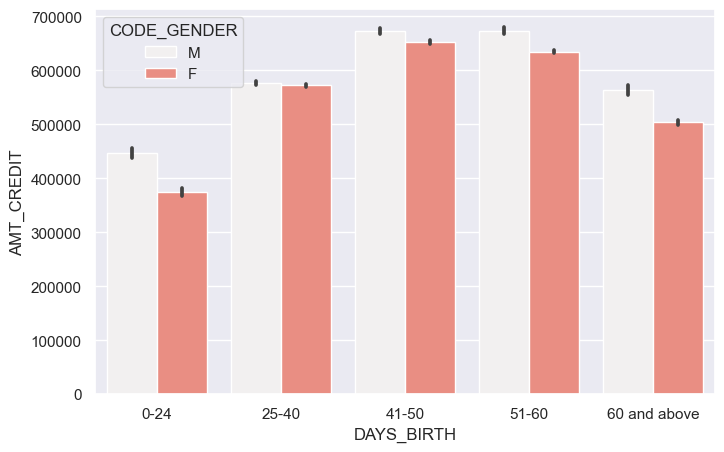

In [224]:
plt.figure(figsize=(8,5))
sns.barplot(data=inp ,x='DAYS_BIRTH', y='AMT_CREDIT', hue='CODE_GENDER',  color="salmon")

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

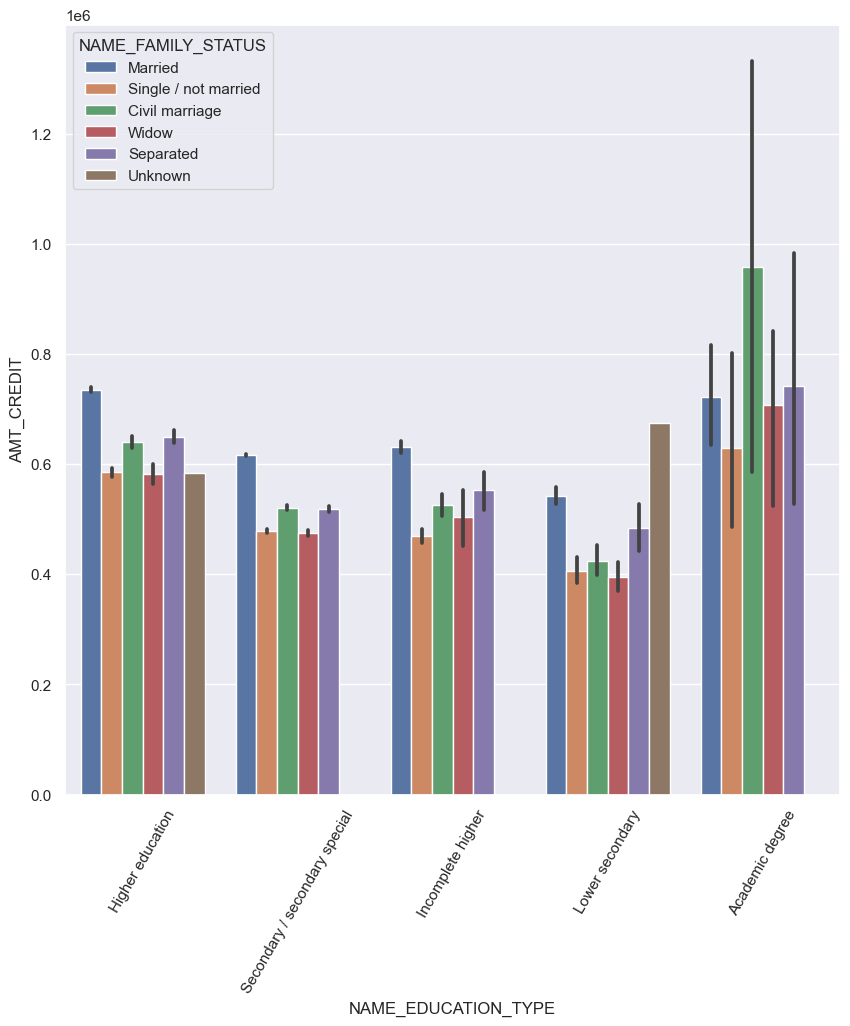

In [225]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=60)

sns.barplot(data=var_TARGET_0 ,x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

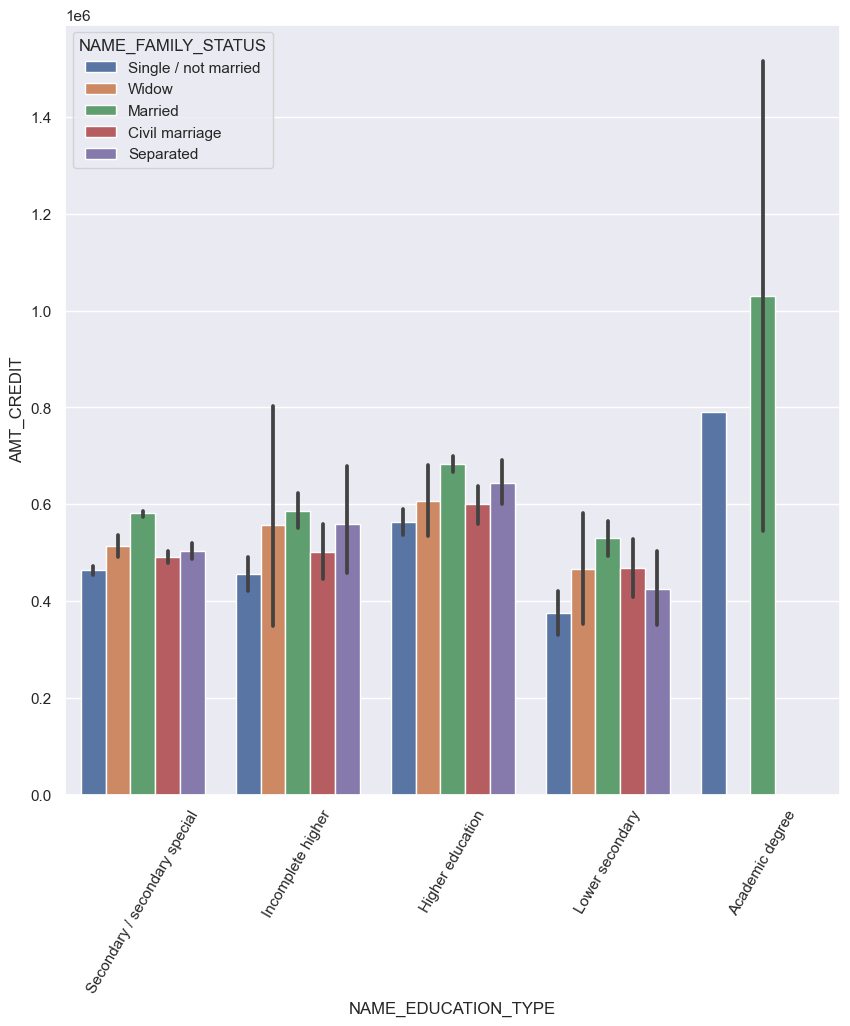

In [226]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=60)

sns.barplot(data=var_TARGET_1 ,x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

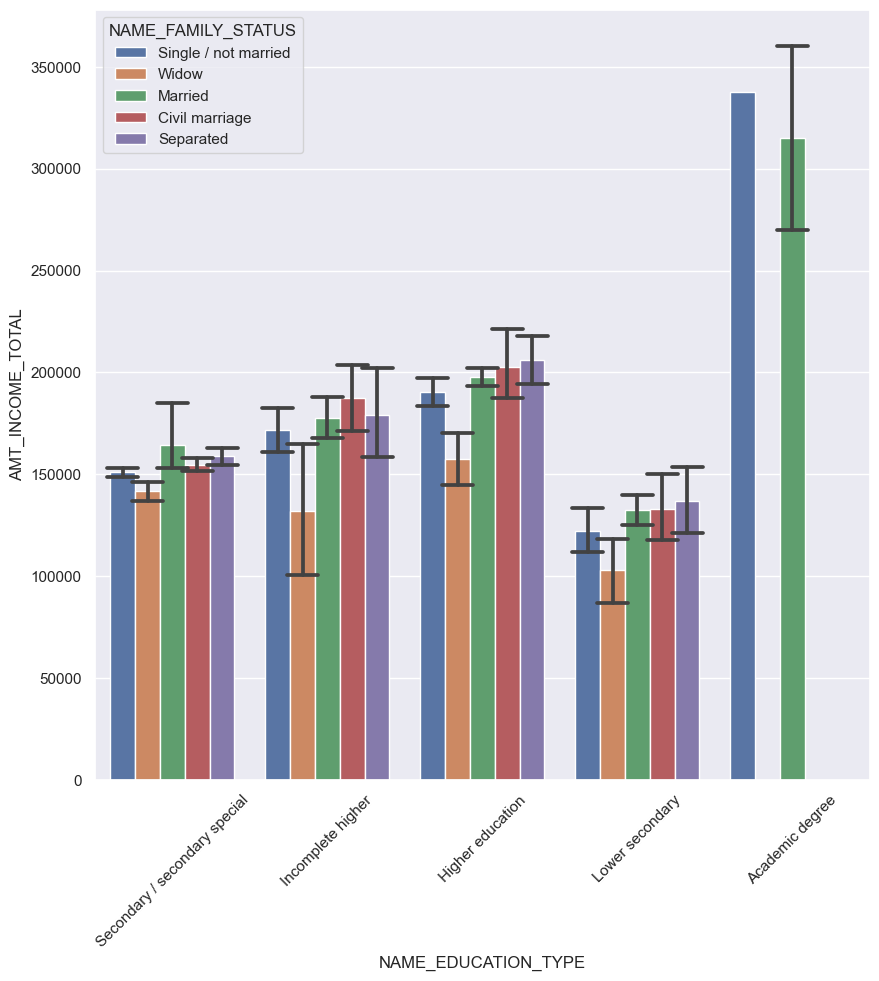

In [227]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)

sns.barplot(data=var_TARGET_1 ,x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS',capsize=.2)

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

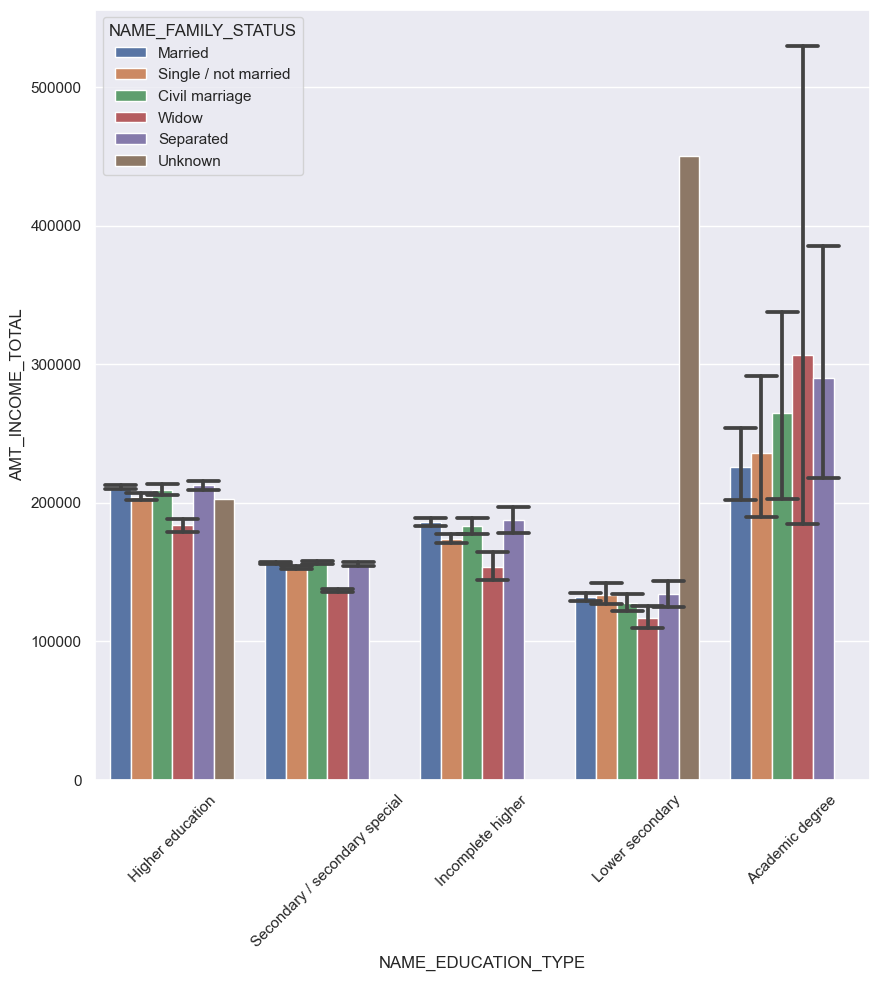

In [228]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)

sns.barplot(data=var_TARGET_0 ,x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS',capsize=.2)

## Analysis for previous_application.

In [229]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  1670214 non-null  int64  
 1   SK_ID_CURR                  1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE          1670214 non-null  object 
 3   AMT_ANNUITY                 1670214 non-null  float64
 4   AMT_APPLICATION             1670214 non-null  float64
 5   AMT_CREDIT                  1670213 non-null  float64
 6   AMT_GOODS_PRICE             1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START     1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE      1670214 non-null  object 
 10  NAME_CONTRACT_STATUS        1670214 non-null  object 
 11  DAYS_DECISION               1670214 non-null  float64
 12  NAME_PAYMENT_TYPE           1670214 non-null  object 
 1

In [230]:
inp0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,XAP,Approved,0.200000,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,XNA,Approved,0.449315,XNA,XAP,Repeater,XNA,Cash,x-sell,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,XNA,Approved,0.824658,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,XNA,Approved,1.402740,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Repairs,Refused,2.139726,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,high


In [231]:
inp0.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
AMT_ANNUITY                   0
AMT_APPLICATION               0
AMT_CREDIT                    1
AMT_GOODS_PRICE               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
NAME_CASH_LOAN_PURPOSE        0
NAME_CONTRACT_STATUS          0
DAYS_DECISION                 0
NAME_PAYMENT_TYPE             0
CODE_REJECT_REASON            0
NAME_CLIENT_TYPE              0
NAME_GOODS_CATEGORY           0
NAME_PORTFOLIO                0
NAME_PRODUCT_TYPE             0
NAME_YIELD_GROUP              0
dtype: int64

### Analysing for the outliers in inp0.

In [232]:
inp0.AMT_ANNUITY.describe()

count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

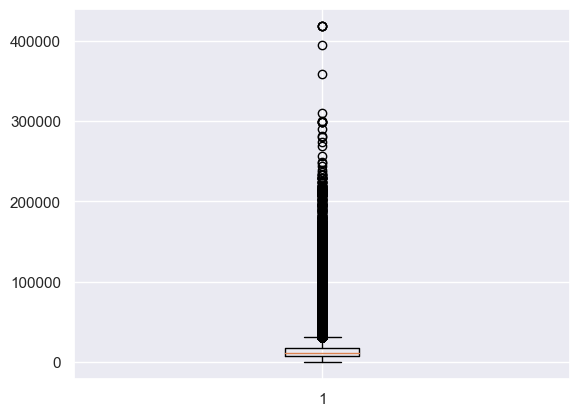

In [233]:
plt.boxplot(inp0.AMT_ANNUITY)
plt.show()

In [234]:
inp0.AMT_APPLICATION.describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


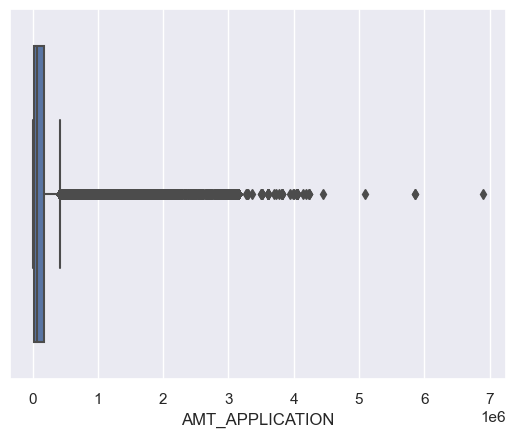

In [235]:
sns.boxplot(inp0.AMT_APPLICATION)
plt.show()

In [236]:
inp0.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


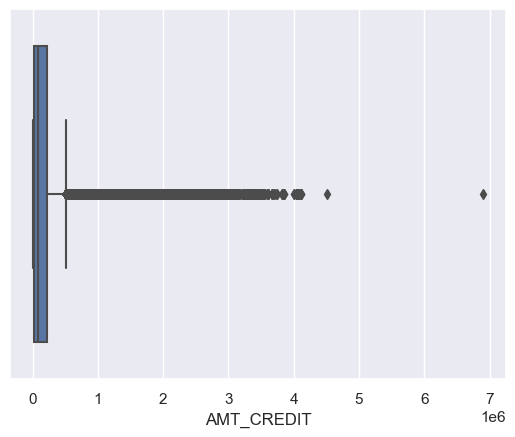

In [237]:
sns.boxplot(inp0.AMT_CREDIT)
plt.show()

In [238]:
inp0.AMT_GOODS_PRICE.describe()

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

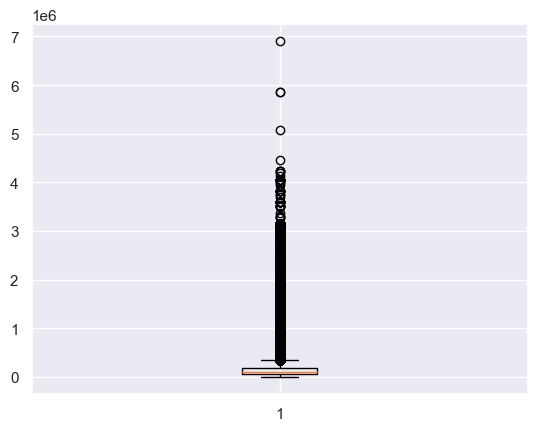

In [239]:
plt.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()

In [240]:
inp0.head(35)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,XAP,Approved,0.200000,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,XNA,Approved,0.449315,XNA,XAP,Repeater,XNA,Cash,x-sell,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,XNA,Approved,0.824658,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,XNA,Approved,1.402740,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Repairs,Refused,2.139726,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Everyday expenses,Approved,1.873973,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,low_normal
6,2315218,175704,Cash loans,11250.000,0.0,0.0,112320.0,TUESDAY,11,XNA,Canceled,0.038356,XNA,XAP,Repeater,XNA,XNA,XNA,XNA
7,1656711,296299,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,7,XNA,Canceled,0.057534,XNA,XAP,Repeater,XNA,XNA,XNA,XNA
8,2367563,342292,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,15,XNA,Canceled,1.057534,XNA,XAP,Repeater,XNA,XNA,XNA,XNA
9,2579447,334349,Cash loans,11250.000,0.0,0.0,112320.0,SATURDAY,15,XNA,Canceled,0.156164,XNA,XAP,Repeater,XNA,XNA,XNA,XNA


In [241]:
inp0.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

#### NAME_CASH_LOAN_PURPOSE contains a lot of XNA values. Comparing it with NAME_GOODS_CATEGORY we made a conclusion that XNA here are thosewho don't want to reveal the purpose of their loan. So we will replace the XNA with unknowns.

In [242]:
inp0['NAME_CASH_LOAN_PURPOSE'] = inp0 ['NAME_CASH_LOAN_PURPOSE'].replace('XNA','Unknowns')

In [243]:
inp0.NAME_CASH_LOAN_PURPOSE.value_counts()      # Successfully replaced XNA with Unknowns.

XAP                                 922661
Unknowns                            677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [244]:
inp0['NAME_GOODS_CATEGORY'] = inp0 ['NAME_GOODS_CATEGORY'].replace('XNA','Unknowns')

In [245]:
inp0.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

In [246]:
inp0['NAME_PAYMENT_TYPE'] = inp0 ['NAME_PAYMENT_TYPE'].replace('XNA','Unknowns')

In [247]:
inp0['CODE_REJECT_REASON'] = inp0 ['CODE_REJECT_REASON'].replace('XNA','XAP')

#### Univariate analysis for previous application.

In [248]:
# Before that we will merge the two data sets.
new_data_set = pd.merge(inp,inp0,on="SK_ID_CURR")

In [249]:
new_data_set.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,XAP,Approved,1.660274,Unknowns,XAP,New,Vehicles,POS,XNA,low_normal
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,Unknowns,Approved,2.043836,Unknowns,XAP,Repeater,Unknowns,Cash,x-sell,low_normal
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,XAP,Approved,2.268493,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,middle
3,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,XAP,Approved,6.413699,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,middle
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,XAP,Approved,2.232877,Cash through the bank,XAP,New,Mobile,POS,XNA,middle


In [250]:
new_data_set.shape

(1413701, 51)

In [251]:
new_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 51 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object  
 3   CODE_GENDER                   1413701 non-null  object  
 4   FLAG_OWN_CAR                  1413701 non-null  int64   
 5   FLAG_OWN_REALTY               1413701 non-null  int64   
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11  NAME_INCOME_TYPE              1413701 non-null  object  
 12  NAME_EDUCATION

In [252]:
vaR_TARGET_0 =new_data_set.loc[new_data_set['TARGET']==0]
vaR_TARGET_1 =new_data_set.loc[new_data_set['TARGET']==1]

### CODE_REJECT_REASON

In [253]:
vaR_TARGET_0.CODE_REJECT_REASON.value_counts()

XAP       1058426
HC         128854
LIMIT       41773
SCO         29373
CLIENT      20892
SCOFR        8599
VERIF        2794
SYSTEM        630
Name: CODE_REJECT_REASON, dtype: int64

In [254]:
vaR_TARGET_0.CODE_REJECT_REASON.value_counts(normalize=True)

XAP       0.819633
HC        0.099783
LIMIT     0.032349
SCO       0.022746
CLIENT    0.016179
SCOFR     0.006659
VERIF     0.002164
SYSTEM    0.000488
Name: CODE_REJECT_REASON, dtype: float64

<AxesSubplot:title={'center':'Rejection Reason'}>

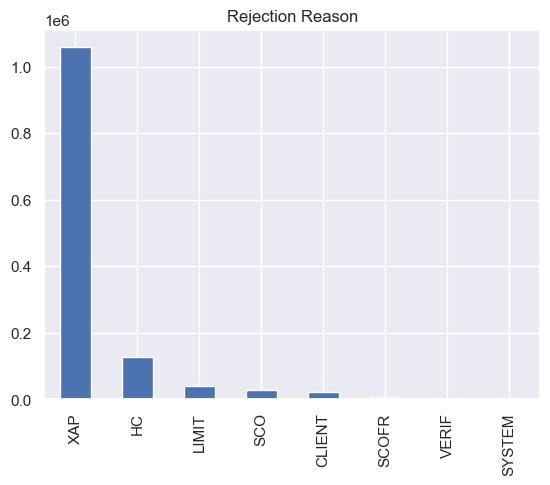

In [255]:
plt.title('Rejection Reason')
vaR_TARGET_0.CODE_REJECT_REASON.value_counts().plot.bar()

In [256]:
vaR_TARGET_1.CODE_REJECT_REASON.value_counts(normalize=True)

XAP       0.747671
HC        0.139997
LIMIT     0.049036
SCO       0.026667
SCOFR     0.018601
CLIENT    0.015356
VERIF     0.002329
SYSTEM    0.000343
Name: CODE_REJECT_REASON, dtype: float64

<AxesSubplot:title={'center':'Rejection Reason'}>

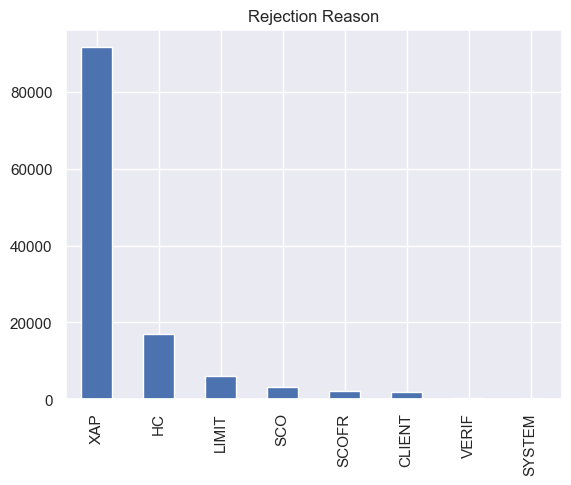

In [257]:
plt.title('Rejection Reason')
vaR_TARGET_1.CODE_REJECT_REASON.value_counts().plot.bar()

### NAME_GOODS_CATEGORY

In [258]:
vaR_TARGET_0.NAME_GOODS_CATEGORY.value_counts()

Unknowns                    722385
Mobile                      176990
Consumer Electronics         97380
Computers                    82635
Audio/Video                  78951
Furniture                    42781
Photo / Cinema Equipment     20051
Construction Materials       19868
Clothing and Accessories     18473
Auto Accessories              5663
Jewelry                       4719
Homewares                     4023
Medical Supplies              3058
Vehicles                      2567
Sport and Leisure             2356
Other                         2203
Gardening                     2166
Office Appliances             1821
Tourism                       1268
Medicine                      1222
Direct Sales                   303
Fitness                        159
Additional Service             102
Education                       84
Weapon                          60
Insurance                       52
Animals                          1
Name: NAME_GOODS_CATEGORY, dtype: int64

<AxesSubplot:title={'center':'Goods Category'}>

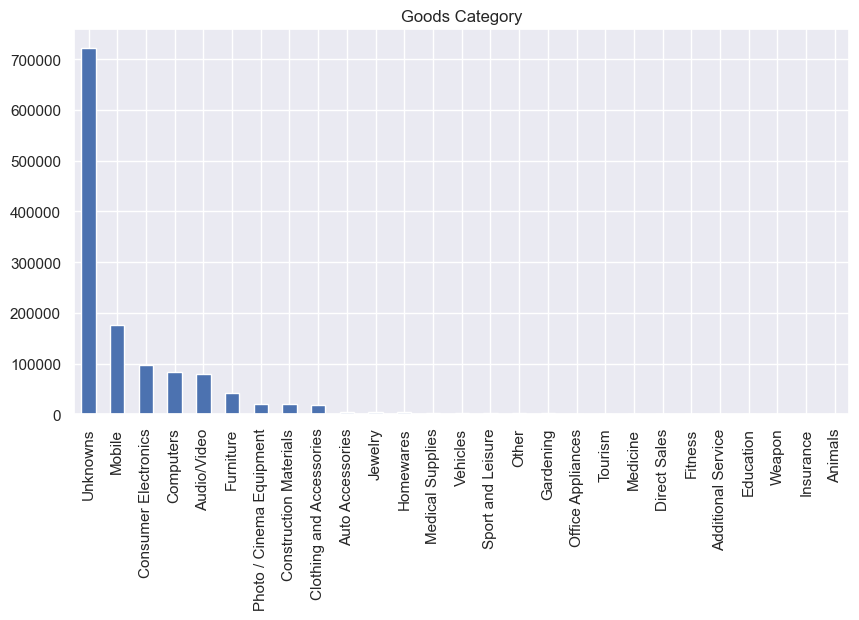

In [259]:
plt.figure(figsize=(10,5))
plt.title('Goods Category')
vaR_TARGET_0.NAME_GOODS_CATEGORY.value_counts().plot.bar()

In [260]:
vaR_TARGET_1.NAME_GOODS_CATEGORY.value_counts()

Unknowns                    74824
Mobile                      16753
Consumer Electronics         7405
Computers                    7288
Audio/Video                  6551
Furniture                    2658
Photo / Cinema Equipment     1656
Construction Materials       1488
Clothing and Accessories     1117
Auto Accessories              565
Jewelry                       469
Vehicles                      287
Homewares                     286
Sport and Leisure             184
Medical Supplies              182
Office Appliances             164
Gardening                     156
Other                         134
Medicine                       80
Tourism                        56
Direct Sales                   27
Additional Service              7
Fitness                         7
Insurance                       6
Education                       5
Weapon                          5
Name: NAME_GOODS_CATEGORY, dtype: int64

<AxesSubplot:title={'center':'Goods Category'}>

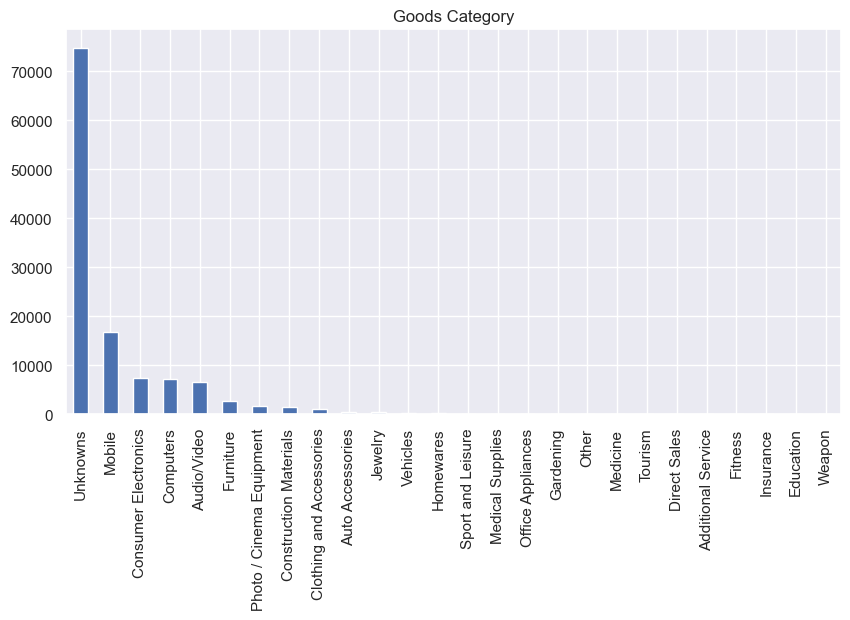

In [261]:
plt.figure(figsize=(10,5))
plt.title('Goods Category')
vaR_TARGET_1.NAME_GOODS_CATEGORY.value_counts().plot.bar()

### NAME_CONTRACT_STATUS

In [262]:
vaR_TARGET_0.NAME_CONTRACT_STATUS.value_counts()

Approved        818856
Canceled        235641
Refused         215952
Unused offer     20892
Name: NAME_CONTRACT_STATUS, dtype: int64

In [263]:
vaR_TARGET_0.NAME_CONTRACT_STATUS.value_counts()/len(vaR_TARGET_0)*100

Approved        63.411291
Canceled        18.247775
Refused         16.723081
Unused offer     1.617853
Name: NAME_CONTRACT_STATUS, dtype: float64

<AxesSubplot:>

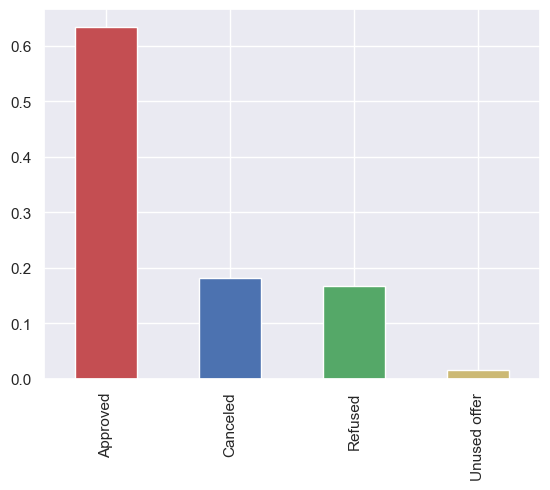

In [264]:
vaR_TARGET_0.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar(color=['r','b','g','y'])

In [265]:
vaR_TARGET_1.NAME_CONTRACT_STATUS.value_counts()

Approved        67243
Refused         29438
Canceled        23800
Unused offer     1879
Name: NAME_CONTRACT_STATUS, dtype: int64

In [266]:
vaR_TARGET_1.NAME_CONTRACT_STATUS.value_counts()/len(vaR_TARGET_1)*100

Approved        54.955051
Refused         24.058516
Canceled        19.450801
Unused offer     1.535633
Name: NAME_CONTRACT_STATUS, dtype: float64

<AxesSubplot:>

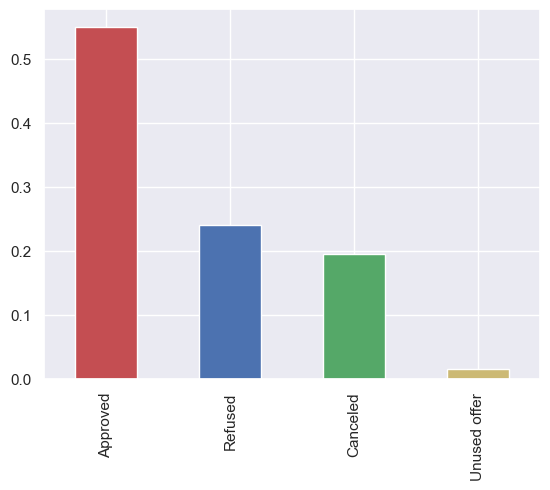

In [267]:
vaR_TARGET_1.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar(color=['r','b','g','y'])

## Bivariate Analysis

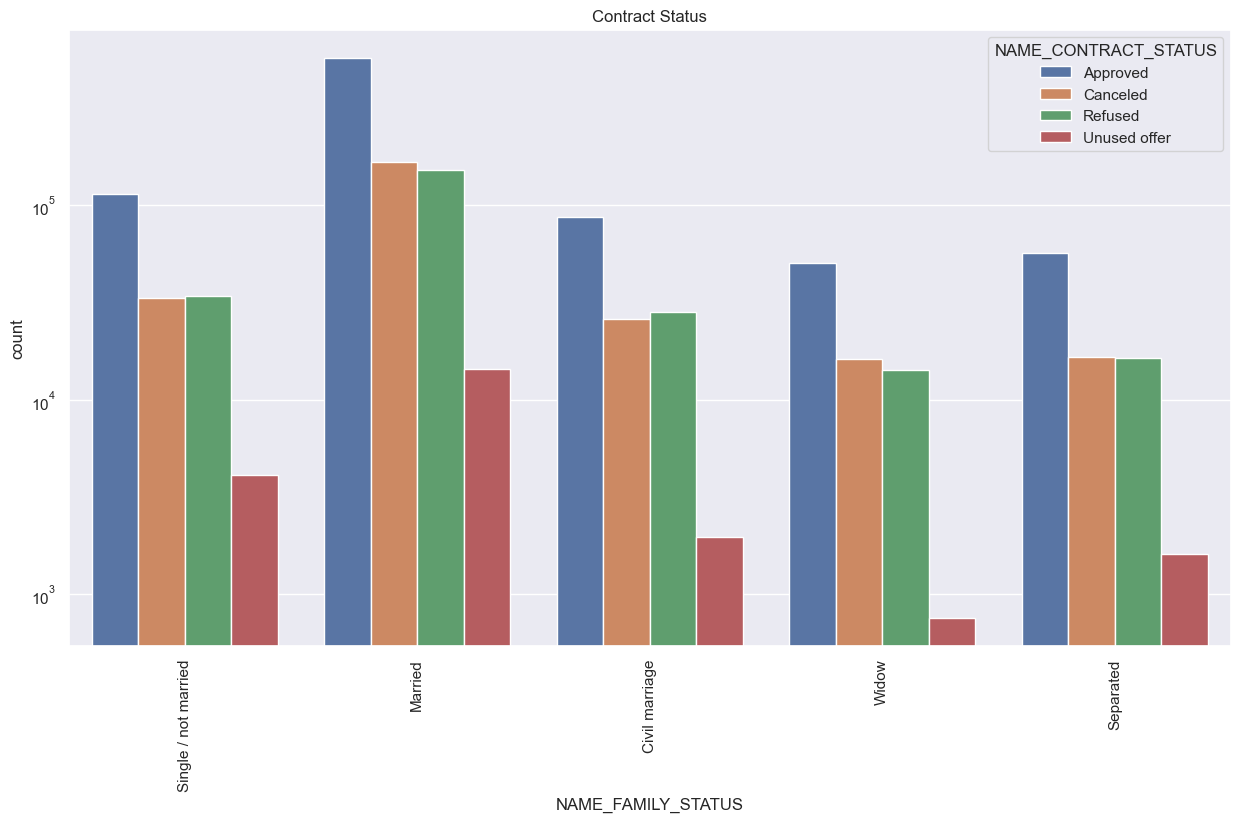

In [268]:
plt.figure(figsize = (15,8))
sns.countplot(x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_STATUS', data = new_data_set)
plt.title('Contract Status')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

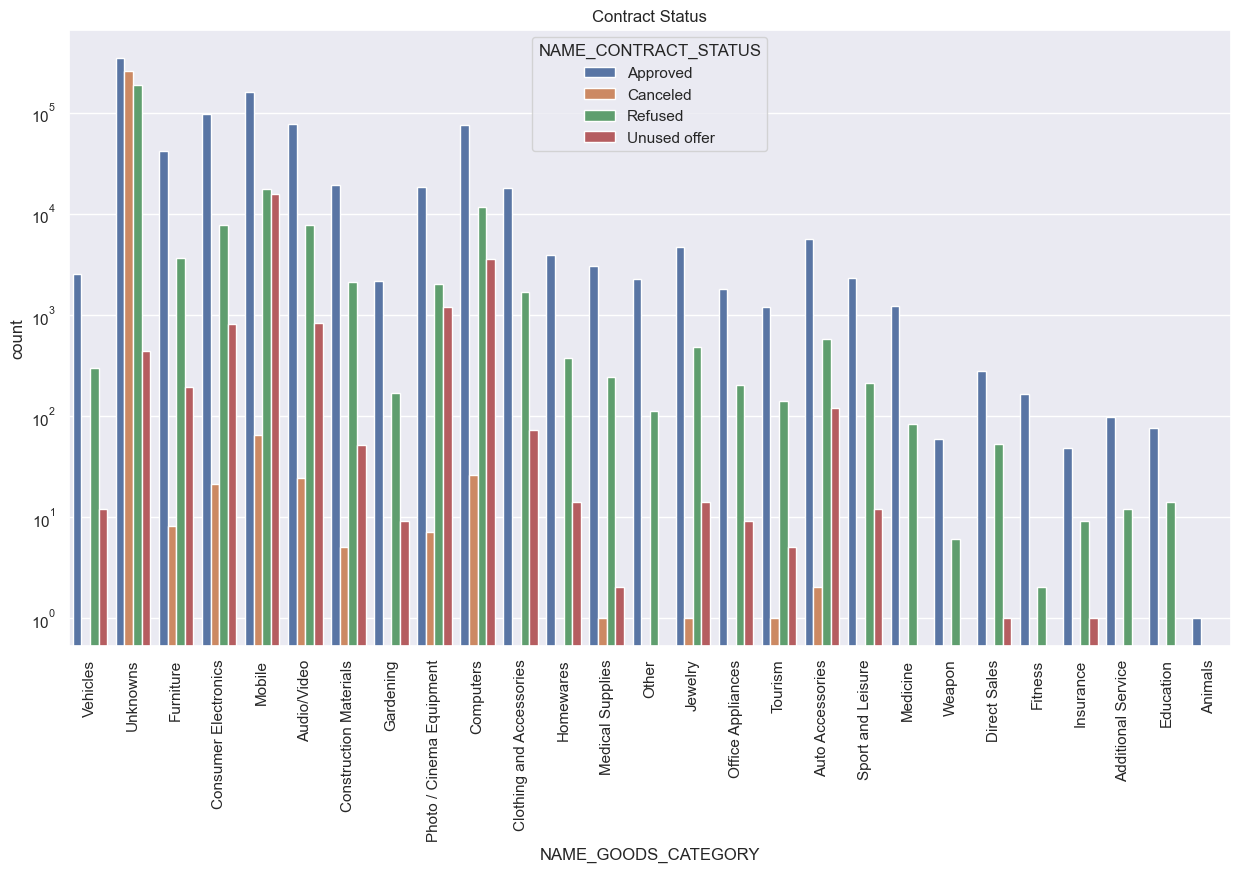

In [269]:
plt.figure(figsize = (15,8))
sns.countplot(x='NAME_GOODS_CATEGORY',hue='NAME_CONTRACT_STATUS', data = new_data_set)
plt.title('Contract Status')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

## We conclude that the following columns are crucial for making the decision for loan approval. 

#### CODE_GENDER

#### OCCUPATION_TYPE

#### AMT_INCOME

#### NAME_CASH_LOAN_PURPOSE

#### AMT_CREDIT

#### NAME_FAMILY_STATUS